<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyBevezetes/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_9_Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
#@title('Ind√≠t√°s ut√°n')
%%capture
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt


from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

from mpl_toolkits.mplot3d import Axes3D


## Bemutatkoz√°s:

Az MTA SZTAKI-ban dolgozom √©s felh≈ë alap√∫ rendszerek optim√°lis kihaszn√°l√°st t≈±ztem ki c√©lul, ezt szeretn√©m
fuzzy logika alapj√°n megval√≥s√≠tani - √∫gy √≠t√©ltem meg, hogy a probl√©m√°ra t√∂k√©letes megold√°s lehet a fuzzy rendszer = sok bemeneti v√°ltoz√≥ alapj√°n kell hozni egy olyan d√∂nt√©st, hogy h√°ny er≈ëforr√°st allok√°ljon a dinamikusan a rendszerhez. A bemeneti v√°ltoz√≥k k√∂z√∂tti kapcsolat nem line√°ris √©s nem egy√©rtelm≈±, hogy milyen kapcsolat van a bemeneti v√°ltoz√≥k √©s kimeneti v√°ltoz√≥ k√∂z√∂tt (ami az er≈ëforr√°sok mennyis√©ge, illetve az, hogy mennyi √∫j er≈ëforr√°st kell hozz√°adni, vagy elvenni) teh√°t ez egy szab√°lyoz√°si feladat.


> minek alapj√°n dolgoztam, a jegyzet bemutat√°sa https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/ch14s07.html

###Pythonban
 dolgoztam, mert a program amiben implement√°lni szeretn√©m a fuzzy rendszert pythonban fog meg√≠r√≥dni mert k√ºlf√∂ldi kollabor√°ci√≥ban k√©sz√≠tj√ºk a programot √©s elv√°r√°s, hogy a programk√≥d pythonban legyen meg√≠rva.

- nem kellett teljesen az alapokt√≥l kezdenem a programoz√°st, mert kit≈±n≈ë √©s sz√©les k√∂rben t√°mogatott fuzzy logic keretrendszerek vannak Pythonban is. (https://pythonhosted.org/scikit-fuzzy/overview.html)

- M√°sr√©szt mot√≠v√°ci√≥m volt, hogy azoknak is be lehessen mutatni a Fuzzy logika m≈±k√∂d√©s√©t, akik nem f√©rhen hozz√°a **MathWork** programcsomaghoz.


- Az eg√©sz programot felt√∂lt√∂ttem egy <a href="https://github.com/JoDeMiro/FuzzyBevezetes" target="_blank">GitHub</a> repositoryba, ahonnan el√©rhet≈ë.

### ToDo
bemutatni, hogy mit nem csin√°ltam m√©g meg de tervbe van v√©ve - [ToDo](#todo)

Az orovosi d√∂nt√©st√°mogat√°s kapcs√°n el lehet mondani, hogy ebben √©n is √©rintett vagyok, mert van egy magas tumormarkerem, ami alapj√°n tov√°bbi vizsg√°latokra k√ºldenek, de mivel a tov√°bbi vizsg√°latok eredm√©nye negat√≠v ez√©rt az kezel≈ëorvosomnak valamilyen d√∂nt√©st kellett hoznia arr√≥l, hogy milyen kezel√©st javasol, vagy egy√°ltal√°n nincs sz√ºks√©g kezel√©sre (fals pozit√≠v az eredm√©ny)

# Fuzzy k√∂vetkeztet√©si rendszerek

Ebben a r√©szben a a fuzzy k√∂vetkeztet√©si rendszerek bemutat√°s√°val foglalkozom.

Ez az interkat√≠v bemutat√≥ a fuzzy k√∂vetkeztet√©st egyes l√©p√©sein √°t muatatja be az alapfogalmakat.

A jegyzetet Dr. Prof. Tak√°cs M√°rta tan√°rn≈ë - Fuzzy k√∂vetkeztet√©si rendszerek c√≠m≈± tant√°rgy√°hoz k√©sz√≠tettem a 2021/2 f√©l√©vben.


### A tant√°rgy tartalma:
Fuzzy oper√°torcsal√°dok √°ttekint√©se. A k√∂vetkeztet√©si rendszerek logikai, fuzzy logikai alapjai.
Bizonytalans√°g kezel√©se a k√∂vetkeztet√©si rendszerekben. √Åltal√°nos fuzzy k√∂vetkeztet√©si rendszerek. Szab√°lyalap√∫ rendszerek. Mamdani √©s Takagi-Sugeno m√≥dszer. Grafikus megjelen√≠t√©s MATLAB k√∂rnyezetben. √öj oper√°torcsal√°dokon alapul√≥ k√∂vetkeztet√©si rendszerek. M√©rn√∂ki alkalmaz√°sokban megjelen≈ë d√∂nt√©si probl√©m√°k numerikus m√≥dszerekkel t√∂rt√©n≈ë megold√°s√°nak lehet≈ës√©gei, √©s a fuzzy k√∂vetkeztet√©si rendszerek alkalmaz√°s√°nak lehet≈ës√©gei. Gazdas√°gi alkalmaz√°sokban alkalmazott fuzzy k√∂vetkeztet√©si rendszerek. K√∂rnyezetv√©delmi √©s term√©szettudom√°nyi alkalmaz√°sok. 

http://aidi.uni-obuda.hu/sites/default/files/OE_AIAMDI_t%C3%A1rgyle%C3%ADr%C3%A1sok_2021.febru%C3%A1r.pdf

<a name="tartalom"></a>

## Tartalom

Bevezet√©s

> [A l√°gy sz√°m√≠t√°si m√≥dszerekr≈ël](#a_lagy_szamitasi_modszerekrol)<br>
> [Fuzzy halmazok](#fuzzy_halmazok)<br>
> [Fuzzy tags√°gi f√ºggv√©nyek](#fuzzy_tagsagi_fuggvenyek)<br>
> [Fuzzifik√°ci√≥](#fuzzifikacio)<br>
> [Fuzzy metszetek](#fuzzy_metszetek)<br>
> [Fuzzy uni√≥k](#fuzzy_uniok)<br>
> [Szab√°lyalkot√°s](#szabalyalkotas)<br>
> [Aggreg√°ci√≥](#aggregacio)<br>
> [Defuzzifik√°ci√≥](#defuzzifikacio)<br>
> Bevezet≈ë p√©lda [Bevezet≈ë p√©lda](#pelda1)<br>
> M√°sodik p√©lda [M√°sodik p√©lda](#pelda2)<br>
> Harmadik p√©lda [Harmadik p√©lda](#pelda3)<br>
> Kitekint√©s [Takagi-Sugeno rendszer](#takagi_sugeno_rendszer)<br>
> ToDo [ToDo](#todo)<br>
> Felhaszn√°lt irodalom [Felhaszn√°lt irodalom](#felhasznalt-irodalom)<br>





# Bevezet√©s

## A l√°gy sz√°m√≠t√°si m√≥dszerekr≈ël

A 'kem√©ny' sz√°m√≠t√°si m√≥dszerekkel szemben a 'l√°gy' sz√°m√≠t√°si m√≥dszerek nem √©les szab√°lyokat alkotnak, hanem egyfajta √°tmenetet k√©peznek  a bemenetek √©s a kimenet k√∂z√∂tt.

A 'l√°gy' sz√°m√≠t√°sok √∂tlet√©t Lofti Zadeh matematikus vetette fel. Elgondol√°sa szerint:

> Az emberi gondolkod√°sm√≥d sokkal jobban modellezhet≈ë olyan fogalmakkal, amelyeknek nincsenek √©les hat√°rai.

Fuzzy annyit tesz magyarul, hom√°lyos, nem tiszta, elmos√≥dott, bizonytalan. A hom√°lyos azt jelenti, hogy az √°tmenet egyik √°llapott√≥l a m√°sikba nem √©les, hanem folyamatos, mint az √°rny√©k, ha t√∂bb f√©nyforr√°s vil√°g√≠t (t√∂bb n√©z≈ëpont), egy√©bk√©nt tiszta √©s egzakt rendszerek √©p√≠thet≈ëek fel elvei alapj√°n.

> Az √°tmenet van igaz √©s hamis k√∂z√∂tt. Bevezeti a r√©szleges igazs√°gtartalmat.

Sz√°mos tudom√°nyter√ºlet √©s alkalmaz√°sban haszn√°lhatunk l√°gy sz√°m√≠t√°si m√≥dszereket az orvostudom√°nyt√≥l, a t√°rsadalomtudom√°nyokon √°t{szociol√≥gia, k√∂zgazdas√°gtan}, k√©pfeldolgoz√°son, kock√°zatkezel√©sen, gazdas√°gi d√∂nt√©sek meghozatal√°n√°l, komplex feladatok megold√°s√°n √°t √©s az optimaliz√°l√°s ter√ºlet√©n.


## Fuzzy logika √©s Fuzzy halmazok

A fuzzy rendszerek jellemz≈ëje, hogy minden megfigyelt jelens√©ghez √∫n. fuzzy halmazokat rendel√ºnk hozz√°, melyek nem sz√°mok, hanem emberi fogalmak. Ezekhez a fuzzy halmazokhoz tartozik egy tags√°gi f√ºggv√©ny √©s egy szab√°lyrendszer.

A fuzzy halmazokat egy p√©ld√°n kereszt√ºl lehet k√∂zelebb hozni az emberi gondolkod√°shoz. Ha egy homokkupacb√≥l elveszek egy homokszemet akkor az m√©g homokkupac, de minn√©l t√∂bb homokszemet veszek el bel≈ële ann√°l kev√©sb√© lesz homokkupac. K√©rd√©s, mikort√≥l nem tekintem homokkupacnak? Ebb≈ël l√°that√≥, hogy az √°tmenet nem √©les. Nem mondhatom, hogy el≈ëbb m√©g homokkupac volt, de egy homokszem elv√©tele ut√°n m√°r nem az. Az √°tmenet ink√°bb folytonos √©s nem h√∫zhat√≥ √©les hat√°r.

## Mikor haszn√°ljunk fuzzy k√∂vetkeztet√©si rendszereket

Olyan rendszerekben, melyek folytonos bemenetekkel √©s nem line√°ris kimeneti f√ºggv√©nyekkel jellemezhet≈ëk. √âs/Vagy amikor sok t√©nyez≈ë, szempont, bemenet alapj√°n √©s ismeret√©ben kell d√∂nt√©st hozznunk √©s a szempontok √∂sszetettek.





<a name="fuzzy_halmazok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy halmazok <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## A k√©tr√©t√©k≈± logik√°ban
A halmazhoz tartoz√°s egy√©rtelm≈±en eld√∂nthet≈ë.

Legyen az A halmaz az X alalphalmaz egy r√©szhalmaza, akkor a karakterisztikus f√ºggv√©ny:

$$X_A:X \rightarrow \left\{ 0,1 \right\} $$
<br>
$$
X_A(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \in \mathbf{A} \\
        0 & \mbox{ha } \ x \notin \mathbf{A}
    \end{array}
\right.
$$

> r√©szhalmaz
$\mathbf{A} \subset \mathbf{B}$ vagy $\mathbf{A} \subseteq \mathbf{B}$ √©s ha $\mathbf{A} \subseteq \mathbf{B}$ √©s $\mathbf{B} \subseteq \mathbf{A}$ akkor $\mathbf{A} = \mathbf{B}$

> val√≥di r√©szhalmaznaz tekintj√ºk, ha $\mathbf{B}$-nek l√©tezik legal√°bb egy eleme ami nem eleme $\mathbf{A}$-nak

> halmaz elemeinek sz√°ma $|\mathbf{A}|$

> halmaz komplemense $\mathbf{\overline{A}}$ az $\mathbf{A}$-ban nem szerepl≈ë elemek.

<br>

<a name="fuzzy_tagsagi_fuggvenyek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy tags√°gi f√ºggv√©ny <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

A tags√°gi f√ºggv√©ny seg√≠ts√©g√©vel tudjuk le√≠rni, egy adott halmazhoz tartoz√°s √©s nem tartoz√°s k√∂z√∂tti fokozatos √°tmenetet. Valamely $x \in X$ eset√©n a $\mu_A(x)$ azt fejezi ki, hogy $x$ milyen m√©rt√©kig tarozik hozz√° $A$ fuzzy halmazhoz.

Az alaphalmaz minden elem√©hez valamilyen r√∂gz√≠tett tartom√°nyb√≥l rendel√ºnk √©rt√©kekekt. Az √©rt√©k nagys√°ga ar√°nyos a halmazhoz tartoz√°s m√©rt√©k√©vel. Ez az √©rt√©k jellemz≈ën 0-1 k√∂z√∂tt van.

### Fuzzy halmaz eset√©n
$h(A)$ a tags√°gi f√ºggv√©ny supr√©muma
$h(A) = \sup_{x \in X}A(x)$, ha a magass√°ga. Ha $H(A) = 1$ akkor a fuzzy halmazt norm√°lisnak nevezz√ºk, ellenkez≈ë esetben $H(A) < 1$ akkoro szubnorm√°lisnak.

A halmaz √©s a tags√°gi f√ºggv√©ny egyen√©rt√©k≈±<br>
Tags√°gi f√ºggv√©ny: $\mu_A:X \rightarrow [0,1]$ √©√©s Fuzzy halmaz: $A:X \rightarrow [0,1]$

P√©ld√°k a leggyakrabban haszn√°lt tags√°gi f√ºggv√©nyek t√≠pusokra.



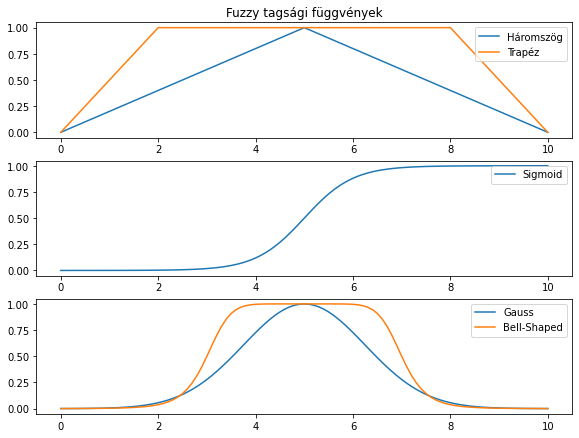

In [ ]:
#@title
import numpy as np
from matplotlib import pyplot as plt

# x = [0, 10]

step = 0.1
x = np.arange(0, 10.001, step)

# H√°romsz√∂g tags√°gi f√ºggv√©ny [a, b, c]
trimf = fuzzy.trimf(x, [0, 5, 10])

# Trap√©z tags√°gi f√ºggv√©ny (a, b, c, d)
trapmf = fuzzy.trapmf(x, [0, 2, 8, 10])

# Sigmoid tags√°gi f√ºggv√©ny - (mean, sigma)
mean = 5.0
sigma = 2.0
sigmf = fuzzy.sigmf(x, mean, sigma)

# Gaussian function
mean = 5.0
sigma = 1.25
gaussmf = fuzzy.gaussmf(x, mean, sigma)

# Generalized Bell-Shaped function
width = 2.0
slope = 4.0
center = 5.0
gbellmf = fuzzy.gbellmf(x, width, slope, center)


fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))

# 3 sor, 1 oszlop
plt.subplot(311)
plt.title("Fuzzy tags√°gi f√ºggv√©nyek")
plt.plot(x, trimf, label="H√°romsz√∂g")
plt.plot(x, trapmf, label="Trap√©z")
plt.legend(loc="upper right")

plt.subplot(312)
plt.plot(x, sigmf, label="Sigmoid")
plt.legend(loc="upper right")

plt.subplot(313)
plt.plot(x, gaussmf, label="Gauss")
plt.plot(x, gbellmf, label="Bell-Shaped")
plt.legend(loc="upper right")

plt.show()


A fuzzy tags√°gi f√ºggv√©ny el≈ë√°l√≠t√°sa (egy lehets√©ges p√©lda) (trap√©z)

$$
\mu_Ai(x) = \left\{
    \begin{array}\\
        0 & \mbox{ha } \ x \leq a_i \\
        \frac{x-a_i}{b_i-a_i} & \mbox{ha } \ a_i \leq x \leq b_i \\
        1 & \mbox{ha } \ b_i \leq x \leq c_i \\
        \frac{d_i-x}{d_i-c_i} & \mbox{ha } \ c_i \leq x \leq d_i \\
        0 & \mbox{ha } \ d_i \leq x
    \end{array}
\right.
$$

ahol, $a_i, b_i, c_i, d_i$ a tags√°gi f√ºggv√©ny param√©terei.

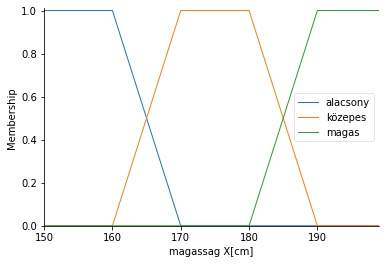

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

x                = np.arange(150, 200, 1)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

Fenti √°bra, p√©lda a Fuzzy tags√°gi f√ºggv√©nyekre. L√°that√≥, hogy h√°rom tags√°gi f√ºggv√©ny van a ‚Äômagassag‚Äô v√°ltoz√≥hoz hozz√°rendelve, ahol minden egyes magass√°g√©rt√©khez hozz√°rendel√ºnk 1 vagy 2 tags√°gi f√ºggv√©nyt.

Az ‚Äôalacsony‚Äô √©s a ‚Äôk√∂zepes‚Äô tags√°gi f√ºggv√©ny **Zadeh f√©le egyens√∫lyi pontja (0.5) x = 165** centim√©tern√©l van.

Az x = 175 centim√©ter p√©ld√°ul csak a ‚Äôk√∂zepes‚Äô tags√°gi f√ºggv√©nyhez tartozik √©s 1.0 √©rt√©ket vesz fel.






## Fuzzy halmazok

Ha √∫gy it√©lik meg, hogy a tags√°gi f√ºggv√©ny √©rt√©k is t√∫l prec√≠z a val√≥s√°gban, akkor az elemekhez a tags√°gi f√ºggv√©ny √©rt√©k helyett **intervallumot** rendelnek. Ez a m√≥dszer jelet≈ësen n√∂veli a sz√°m√≠t√°sig√©nyt. Jelenleg nem foglalkozom ezzel a m√≥dszerrel, de hogy el tudjuk k√©pzelni mit jelent ez, egy k√©ppel tudom illusztr√°lni.



In [ ]:
(170-161) /(170-160)

0.9


<a name="fuzzifikacio"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzifik√°l√°s, Fuzzyfik√°ci√≥ <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Gyakorlatilag meghat√°rozzuk a tags√°gi f√ºggv√©nyeket, √©s az egyes crisp √©rt√©keket hozz√°juk rendelj√ºk. Al√°bb a testmagass√°g egy lehets√©ges fuzzifik√°ci√≥ja.

$A$ = {alacsony, k√∂zepes, magas}
<br>

$$
A_1(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \leq 150 \\
        \frac{170-x}{170-160} & \mbox{ha } \ 160 \leq x \leq 170 \\
        0 & \mbox{ha } \ 170 \leq x
    \end{array}
\right.
$$

Ez√©rt $A_1(175) = (170-165) /(170-160) = 0.5$



Magassag['alacsony'](3) : 	0.50
Magassag['k√∂zepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


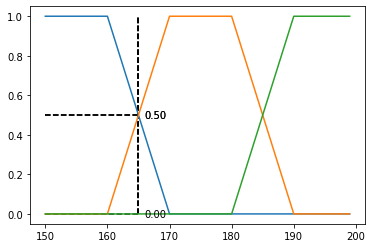

In [ ]:

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(165)

A fenti Python k√≥d kisz√°m√≠tja, hogy egy adott x √©rt√©k melyik tags√°gi f√ºggv√©nyen milyen √©rt√©ket vesz fel √©s ezt grafikusan is √°br√°zolja. 
 
A p√©ld√°ban a x = 165 centim√©ter az ‚Äôalacsony‚Äô √©s a ‚Äôk√∂zepes‚Äô tags√°gif√ºggv√©nyhez is 0.5 √©rt√©kben tartozik √©s 0.0 m√©rt√©kben a ‚Äômagas‚Äô tags√°gif√ºggv√©nyhez. 

In [ ]:
interact(membershipDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), Output()), _dom_classes=('widg‚Ä¶

Ugyan ezen k√∂r√ºlm√©nyek k√∂z√∂tt az x = 168 √©rt√©k az ‚Äôalacsony‚Äô tf-en 0.2 a ‚Äôk√∂zepes‚Äô tf-en 0.8 √©rt√©ket vesz fel.

## Axi√≥m√°k

A: az X fuzzy halmaza

Defin√≠ci√≥ szerint ùë• ‚àà ùëã-nek az A halmazhoz tartoz√°s√°nak m√©rt√©ke: A(x)
Ekkor az A halmaz c t√≠pus√∫ komplemense ca(x) az az √©rt√©k, amilyen
m√©rt√©kben x nem tartozik A-hoz. A Fuzzy komplemens: ùëê: 0,1 ‚Üí 0,1 f√ºggv√©ny ‚àÄùê¥(ùë•) tags√°gi f√ºggv√©ny √©rt√©khez tetsz≈ëleges ‚ÄûA‚Äù fuzzy halmaz eset√©n a ùëê ùê¥ ùë• √©rt√©ket rendeli hozz√°.

$c1$ axi√≥ma: $c(0) = 1$ √©s $c(1) = 0$ (peremfelt√©tel)

$c2$ axi√≥ma: $\forall, b \in [0,1]$ eset√©n
ha $a \leq b$ akkor $c(a) \geq c(b)$ (monotonit√°s)

$c2$ azt √≠rja el≈ë, hogy a komplemens monoton cs√∂kken≈ë legyen: az $A$ halmaz
tags√°gi f√ºggv√©ny √©rt√©k√©nek n√∂veked√©s√©vel a komplemens $c(a)$ √©rt√©ke nem
n≈ëhet.

**Egyens√∫lyi pont**: az az $a$ √©rt√©k amire $c(a) = a$
Zadehn√©l $a = 0.5$ az egyens√∫lyi pont.

<br>

<a name="fuzzy_metszetek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy metszetek (A t-norm√°k)

A fuzzy metszetek minim√°lisan elv√°rt tulajdons√°gait axi√≥m√°k fogalmazz√°k meg, amelyek a Boole metszet fogalom term√©sztes √°ltal√°nos√≠t√°s√°t adj√°k.

$$t: [0,1] \times [0,1] \rightarrow [0,1]$$

$t_1$ axi√≥ma: $(t(a,1) = a, \forall a \in [0,1]$-re (peremfelt√©tel)

$t_2$ axi√≥ma: $b \leq c$-b≈ël k√∂vetkezik, hogy $t(a,b) \leq t(a,c), \forall a, b,c \in [0,1]$ (monotonit√°s)

$t_3$ axi√≥ma: $(t(a,b) = t(b,a), \forall a,b \in [0,1]-$-re (kommutativit√°s)

$t_4$ axi√≥ma: $(t(a,t(b,c)) = t(t((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativit√°s)

<br>

$t_2$ √©s $t_3$ azt a k√∂vetelm√©nyt fejezi ki, hogy ha $A$-ban vagy $B$-ben a tags√°gi √©rt√©k cs√∂kken, az nem eredm√©nyezheti a metszet $A \cap B$ n√∂veked√©s√©t.

<br>

Zadeh-f√©le metszet:

$$ t(a,b) = min(a,b) $$

Algebrai szorzat:

$$ t(a,b) = ab $$

Korl√°tos k√ºl√∂nbs√©g:

$$ t(a,b) = max(0,a+b-1) $$

P√©ld√°k:






Magassag['alacsony'](3) : 	0.50
Magassag['k√∂zepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


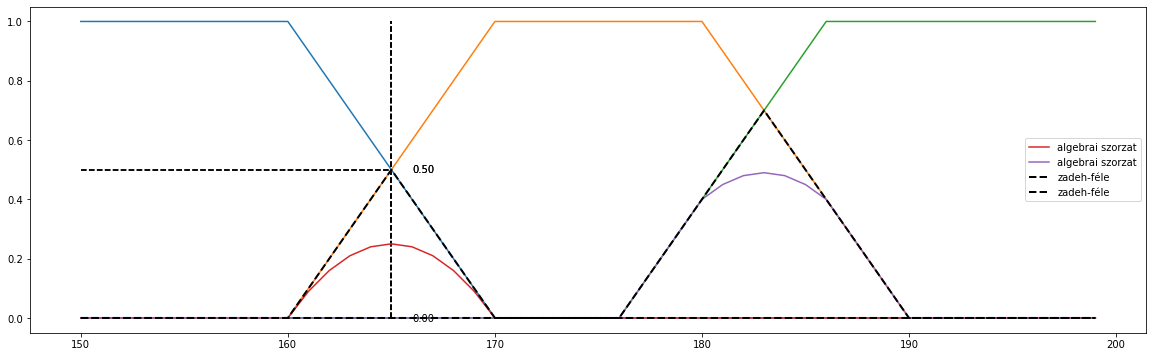

In [ ]:



#@title
def membershipANDDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  algebrai = np.asarray(container[0])*np.asarray(container[1])
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  algebrai = np.asarray(container[1])*np.asarray(container[2])
  plt.plot(x, algebrai, label = 'algebrai szorzat')


  # zadeh f√©le fuzzy metszet
  zadeh = np.minimum(np.asarray(container[0]),np.asarray(container[1]))
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')

  zadeh = np.minimum(np.asarray(container[1]),np.asarray(container[2]))
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')



  plt.legend()

membershipANDDemo(165, 176, 186)

In [ ]:
interact(membershipANDDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti‚Ä¶


<a name="fuzzy_uniok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy uni√≥k (t-kononrm√°k)

A fuzzy uni√≥k minim√°lisan elv√°rt tulajdons√°gait axi√≥m√°k fogalmazz√°k meg.

$$s: [0,1] \times [0,1] \rightarrow [0,1]$$

$s_1$ axi√≥ma: $(s(a,1) = a, \forall a \in [0,1]$-re (peremfelt√©tel)

$s_2$ axi√≥ma: $b \leq c$-b≈ël k√∂vetkezik, hogy $s(a,b) \leq s(a,c), \forall a, b,c \in [0,1]$ (monotonit√°s)

$s_3$ axi√≥ma: $(s(a,b) = s(b,a), \forall a,b \in [0,1]-$-re (kommutativit√°s)

$s_4$ axi√≥ma: $(s(a,s(b,c)) = s(s((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativit√°s)


<br>

Zadeh-f√©le uni√≥:

$$ s(a,b) = max(a,b) $$

Algebrai √∂sszeg:

$$ s(a,b) = a + b - ab $$

Korl√°tos √∂sszeg:

$$ s(a,b) = min(1,a+b) $$

P√©ld√°k:



Magassag['alacsony'](3) : 	0.50
Magassag['k√∂zepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


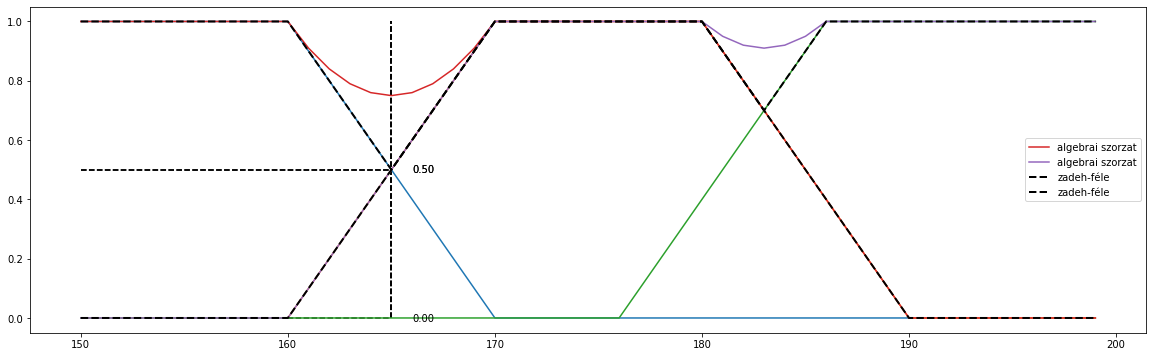

In [ ]:
#@title
def membershipORDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  # zadeh f√©le fuzzy metszet
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-f√©le', color='black', lw = 2, linestyle='dashed')

  plt.legend()

membershipORDemo(165, 176, 186)

In [ ]:
interact(membershipORDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti‚Ä¶


<a name="aggregacio"></a>

[vissza a tartalomhoz](#tartalom)

# Aggreg√°ci√≥

T√∂bb fuzzy halmaz megfelel≈ë m√≥don t√∂rt√©n≈ë egyes√≠t√©se √°ltal egyetlen fuzzy
halmazt √°ll√≠tanak el≈ë.

$$h[0,1]^n \rightarrow [0,1], n \geq 2$$

Ha a $h$ f√ºggv√©ny argumentumai az X alaphalmazon √©rtelmezett $A_1(x), ..., A_n(x)$ fuzzy halmazok, akkor $h \forall x \in X$-re fuzzy halmazt √°ll√≠t el≈ë az argumentumok tags√°gi √©rt√©keinek seg√≠ts√©g√©vel,

$$A(x) = h(A_1(x), ..., A_n(x))$$

Gyakorlatban ezt √∫gy √©rj√ºk el, hogy szab√°lyok konstru√°lunk √©s v√©g√ºl az √∂sszes szab√°ly alapj√°n el≈ë√°ll√≠tjuk az √∫j fuzzy halmazokat.

# Az implik√°ci√≥ annyiban k√ºl√∂nb√∂zik,

Az agreg√°ci√≥t√≥l, hogy egy v√°ltoz√≥n l√©trehozott tags√°gi f√ºggv√©nyek √©rt√©keinek kisz√°m√≠t√°s√°ra haszn√°lja a szakirodalom az implik√°ci√≥ sz√≥t.

M√≠g az aggreg√°ci√≥ az √∂sszes v√°ltoz√≥ra √©rv√©nyes szab√°ly alapj√°n l√©trehozott √©rt√©kek el≈ë√°ll√≠t√°s√°ra √©s √∫j fuzzy halmazhoz rendel√©s√©re haszn√°lj√°k.


Magassag['alacsony'](3) : 	0.80
Magassag['k√∂zepes'](3) : 	0.20
Magassag['magas'](3) : 	0.00


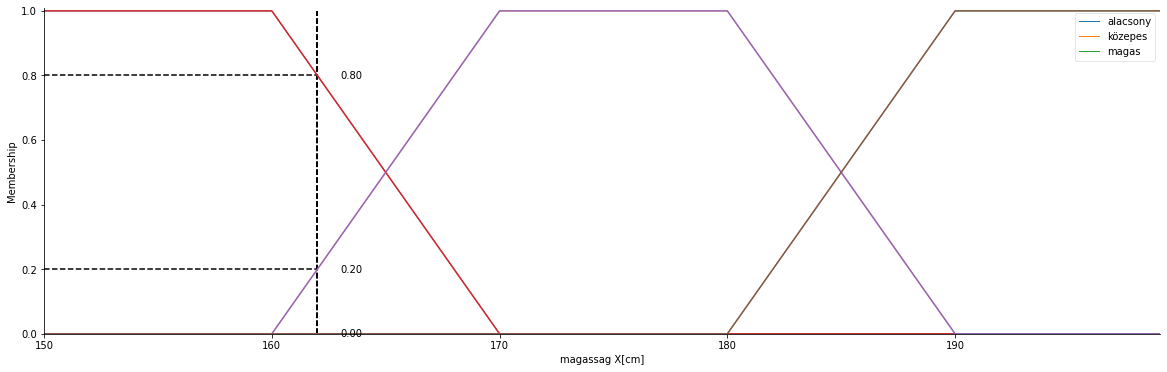

In [ ]:
#@title


Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(162)

Testtomeg['sov√°ny'](3) : 	0.30
Testtomeg['k√∂zepes'](3) : 	0.70
Testtomeg['k√∂v√©r'](3) : 	0.00


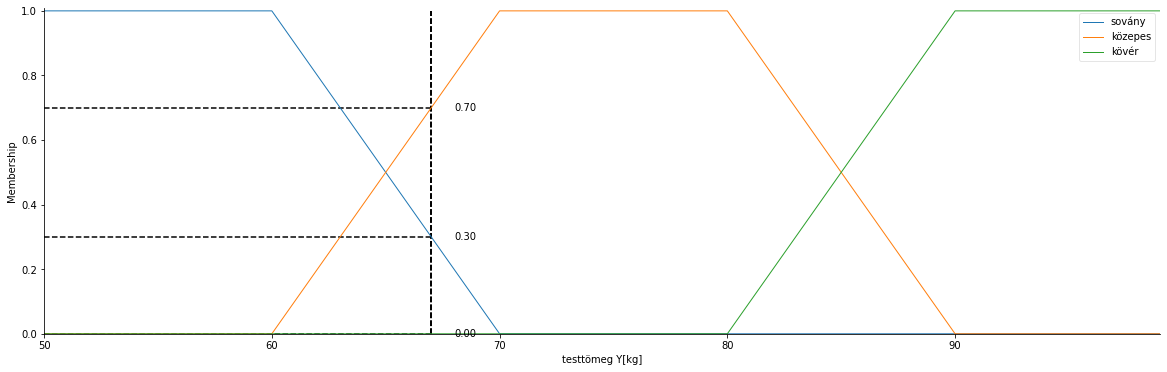

In [ ]:
#@title

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testt√∂meg Y[kg]')

Testtomeg.defuzzify_method = 'centroid'
Testtomeg.universe.mean()

Testtomeg['sov√°ny'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['k√∂zepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['k√∂v√©r'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Testtomeg.view()

def testtomegDemo(x_):
  for key in Testtomeg.terms.keys():
    plt.plot(x, Testtomeg[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 50, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

testtomegDemo(67)




A k√©t fenti fuzzy halmaz egy lehets√©ges aggreg√°ci√≥ja



In [ ]:
#@title
Allapot         = ctrl.Antecedent(np.arange(0, 40, 1), '√°llapot subjekt√≠v pontsz√°m')

Allapot.defuzzify_method = 'centroid'
Allapot.universe.mean()

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['norm√°lis'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['t√∫ls√∫lyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])

# Allapot.view()

In [ ]:
#@title
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])


In [ ]:
magass√°g = 166
testt√∂meg = 88

Magassag['alacsony'](3) : 	0.40
Magassag['k√∂zepes'](3) : 	0.60
Magassag['magas'](3) : 	0.00
Testtomeg['sov√°ny'](3) : 	0.00
Testtomeg['k√∂zepes'](3) : 	0.20
Testtomeg['k√∂v√©r'](3) : 	0.80
IF magassag[magas] AND testtomeg[sov√°ny] THEN allapot[anorexia]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[sov√°ny] THEN allapot[norm√°lis]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[k√∂zepes] AND testtomeg[k√∂zepes] THEN allapot[norm√°lis]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[magas] AND testtomeg[k√∂v√©r] THEN allapot[norm√°lis]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[k√∂v√©r] THEN allapot[t√∫ls√∫lyos]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
√Ållapot  : 27.17424242424242
----------------------------------------
magassag : 166
testtomeg : 

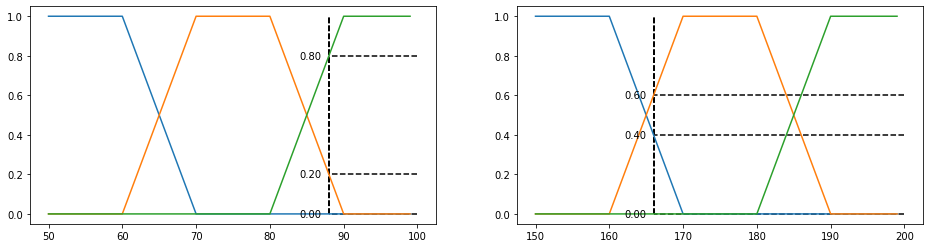

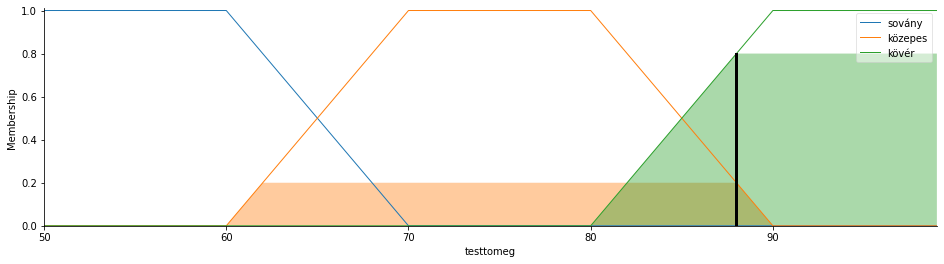

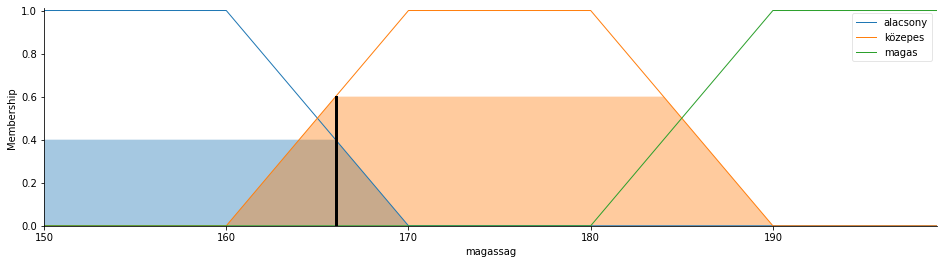

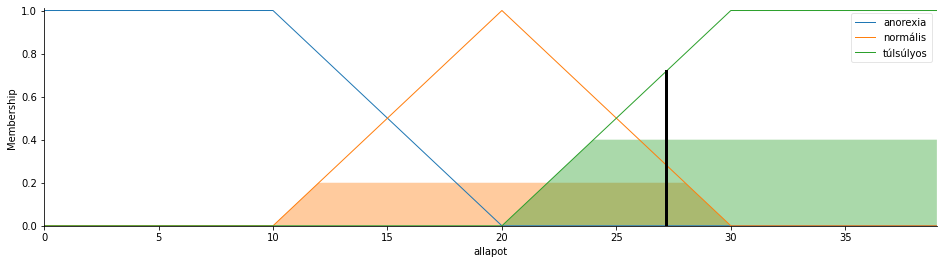

In [ ]:
#@title

plt.rcParams["figure.figsize"] = (16,4)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

Testtomeg['sov√°ny'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['k√∂zepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['k√∂v√©r'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['norm√°lis'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['t√∫ls√∫lyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])



# rules
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)


def testtomegDemo(x1_):

  x1 = np.arange(50, 100, 1)

  for key in Testtomeg.terms.keys():
    ax1.plot(x1, Testtomeg[key].mf)

    xv = x1_

    value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

    ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



#---------------------------------------------------------------------------


def magassagDemo(x2_):

  x2 = np.arange(150, 200, 1)

  for key in Magassag.terms.keys():
    ax2.plot(x2, Magassag[key].mf)

    xv = x2_

    value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

    ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


magassagDemo(magass√°g)

testtomegDemo(testt√∂meg)

#---------------------------------------------------------------------------


# a szab√°lyok
print(rule1)
print(rule2)
print(rule3)
print(rule4)
print(rule5)

# k√©t szab√°lyunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['magassag'] = magass√°g
simulation.input['testtomeg'] = testt√∂meg

simulation.compute()

print('----------------------------------------')
print('√Ållapot  :', simulation.output['allapot'])
print('----------------------------------------')
print(simulation.input)


Testtomeg.view(sim = simulation)
Magassag.view(sim = simulation)
Allapot.view(sim = simulation)


In [ ]:
#@title
def demo(a1, a2, px=16, py=4):
  plt.rcParams["figure.figsize"] = (px,py)

  magass√°g = a1
  testt√∂meg = a2

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['k√∂zepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

  Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

  Testtomeg['sov√°ny'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
  Testtomeg['k√∂zepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
  Testtomeg['k√∂v√©r'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

  Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

  Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
  Allapot['norm√°lis'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
  Allapot['t√∫ls√∫lyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])


  # rules
  rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

  rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
  rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
  rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

  rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])


  # plot
  fig, (ax1, ax2) = plt.subplots(1, 2)


  def testtomegDemo(x1_):

    x1 = np.arange(50, 100, 1)

    for key in Testtomeg.terms.keys():
      ax1.plot(x1, Testtomeg[key].mf)

      xv = x1_

      value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

      # print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

      ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



  #---------------------------------------------------------------------------


  def magassagDemo(x2_):

    x2 = np.arange(150, 200, 1)

    for key in Magassag.terms.keys():
      ax2.plot(x2, Magassag[key].mf)

      xv = x2_

      value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

      # print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

      ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


  magassagDemo(magass√°g)

  testtomegDemo(testt√∂meg)

  #---------------------------------------------------------------------------


  # k√©t szab√°lyunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['magassag'] = magass√°g
  simulation.input['testtomeg'] = testt√∂meg

  simulation.compute()

  # print('----------------------------------------')
  # print('√Ållapot  :', simulation.output['allapot'])
  # print('----------------------------------------')
  # print(simulation.input)


  Testtomeg.view(sim = simulation)
  Magassag.view(sim = simulation)
  Allapot.view(sim = simulation)

  return simulation

In [ ]:
#@title
a1 = widgets.IntSlider(min=150, max=200, step=1, value=166)
a2 = widgets.IntSlider(min=50, max=100, step=1, value=88)
px = widgets.IntSlider(min=8, max=15, step=1, value=11)
py = widgets.IntSlider(min=2, max=10, step=1, value=3)

ui = widgets.HBox([a1, a2, px, py])

out = widgets.interactive_output(demo, {'a1': a1, 'a2': a2, 'px': px, 'py': py})

display(ui, out)


Output()

## Aggreg√°ci√≥ (folyt.)

A fenti p√©ld√°ban l√°thatjuk , hogy A1(testt√∂meg) √©s A2(magass√°g) egy√ºttesen adt√°k a hozz√°rendel√©si szab√°lyokat.


```
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sov√°ny'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sov√°ny'], consequent = Allapot['norm√°lis'])
rule3 = ctrl.Rule(antecedent= Magassag['k√∂zepes'] & Testtomeg['k√∂zepes'], consequent = Allapot['norm√°lis'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['k√∂v√©r'], consequent = Allapot['norm√°lis'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])
```

Most csak az 5 szab√°lyt figyelembe v√©ve n√©zz√ºk meg, hogy mi a hozz√°rendel√©si szab√°ly √©s hogyan alakul az √©rt√©k√ºk.

```
rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['k√∂v√©r'], consequent = Allapot['t√∫ls√∫lyos'])
```

Ha magass√°g = ‚Äòalacsony‚Äô √©s testt√∂meg = ‚Äòk√∂v√©r‚Äô, akkor hozz√°rendel√©s ‚Äòt√∫ls√∫lyos‚Äô. De milyen tags√°gif√ºggv√©ny √©rt√©ket fog kapni a ‚Äòt√∫ls√∫lyos‚Äô tf? 

Ennek kisz√°m√≠t√°s√°hoz tekints√ºk √°t, hogy az adott szab√°lyhoz (rule5) tartoz√≥ v√°ltoz√≥k k√∂z√∂tt milyen hozz√°rendel√©si szab√°ly van (√©s, vagy {min, max}) illetve, hogy milyen √©rt√©ket vesznek fel. Ugyanis ezek alapj√°n fogjuk kisz√°molni, hogy milyen √©rt√©ket kap a kimeneti halmazon az adott x √©rt√©k 

$\mu(X_{1_1} = 166) = 0.4$ magass√°g, alacsony

$\mu(X_{1_2}= 166) = 0.6$ magass√°g, k√∂zepes

$\mu(X_{1_3}= 166) = 0.0$ magass√°g, magas

$\mu(X_{2_1}= 166) = 0.0$ testt√∂meg, sov√°ny

$\mu(X_{2_1}= 166) = 0.2$ testt√∂meg, k√∂zepes

$\mu(X_{2_2}= 166) = 0.8$ testt√∂meg, k√∂v√©r

Csak a 5. hozz√°rendel√©si szab√°lyra tekintve 

```
rule5 = Magassag['alacsony'](0.4) & Testtomeg['k√∂v√©r'](0.8) -> Allapot['t√∫ls√∫lyos']) 
```
A k√©t v√°ltoz√≥ k√∂z√∂tti ‚Äò&‚Äô ‚ÄòAND‚Äô logika miatt a k√©t √©rt√©k k√∂z√ºl a minimumot vessz√ºk. Ha ez a logikai kapcsol√≥ ‚Äò|‚Äô ‚ÄòOR‚Äô lenne, akkor a k√©t √©rt√©k k√∂z√ºl a nagyobbat vessz√ºk figyelembe ‚Äì de most nem ez a helyzet, ez√©rt az √Ållapot halmaz ‚Äòt√∫ls√∫lyos‚Äô tags√°gi f√ºggv√©ny√©hez a 0.4 √©rt√©ket rendelj√ºk hozz√°. 



$$w_1 = max(0.4, 0.8) = 0.4$$

Van egy m√°sik szab√°ly is, amely hozz√°rendel√©st √°ll√≠t el≈ë a magass√°g = 166, testt√∂meg = 88 bemeneti v√°ltoz√≥k alapj√°n. Ez pedig a 3. hozz√°rendel√©si szab√°ly: 

```
rule3 =  Magassag['k√∂zepes'](0.6) & Testtomeg['k√∂zepes'](0.2) -> Allapot['norm√°lis']) 
```

$$w_2 = max(0.6, 0.2) = 0.2$$, az √Ållapot v√°ltoz√≥ 'norm√°lis' tags√°gi f√ºggv√©ny√©hez tartoz√≥ √©rt√©k.

Ha megfigyelj√ºk a fenti √°br√°t ‚Äònarancss√°rga‚Äô sz√≠n jel√∂li a ‚Äònorm√°lis‚Äô tags√°gi f√ºggv√©nyhez tartoz√≥ s√∫lyt (0.2), √©s ‚Äòz√∂ld‚Äô sz√≠nnel jel√∂ltem a ‚Äòt√∫ls√∫lyos‚Äô tags√°gif√ºggv√©nyhez tartoz√≥ s√∫lyt (0.4). 








# ToDo ezt az √°br√°t √°t kell alak√≠tanom √∫gy, hogy a fenti sz√°m√≠t√°s kij√∂jj√∂n

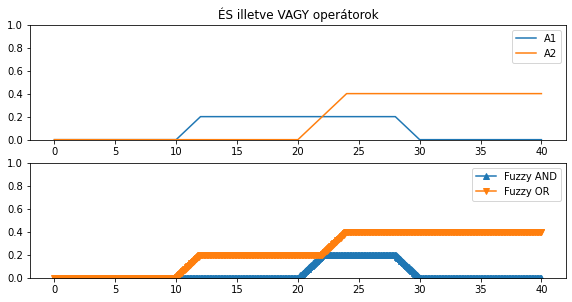

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzzy
from matplotlib import pyplot as plt

# x = [0, 10]
step = 0.05
x = np.arange(0, 40.001, step)

# H√°romsz√∂g tags√°gi f√ºggv√©ny
x1 = np.arange(0, 40.001, step)
trimf = fuzzy.trimf(x1, [10, 20, 30])
trimf = np.minimum(trimf, 0.2)

# Trap√©z tags√°gif√ºggv√©ny
x2 = np.arange(0, 40.001, step)
trapmf = fuzzy.trapmf(x2, [20, 30, 40, 40])
trapmf = np.minimum(trapmf, 0.4)


# 1 - tags√°gif√ºggv√©ny
tri_not = fuzzy.fuzzy_not(trimf)
trap_not = fuzzy.fuzzy_not(trapmf)

# √âs/Vagy oper√°torok a k√©t tags√°gif√ºggv√©nyen
x3, tri_trap_and = fuzzy.fuzzy_and(x1, trimf, x2, trapmf)
x3, tri_trap_or = fuzzy.fuzzy_or(x1, trimf, x2, trapmf)

# Megjelen√≠t√©s
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))

plt.subplot(3, 1, 1)
plt.title("√âS illetve VAGY oper√°torok")
plt.plot(x1, trimf, label="A1")
plt.plot(x2, trapmf, label="A2")
plt.legend(loc="upper right")
plt.ylim(0,1)

plt.subplot(3, 1, 2)
plt.plot(x3, tri_trap_and, label="Fuzzy AND", marker="^")
plt.plot(x3, tri_trap_or, label="Fuzzy OR", marker="v")
plt.legend(loc="upper right")
plt.ylim(0,1)

plt.show() # +36 1 279 6064 lab

# Defuzzifik√°ci√≥

A tags√°gi f√ºggv√©nyekhez tartoz√≥ [0, 1] √©rt√©ke folytonos √©rt√©kekk√© alak√≠t√°sa.

$$ y = \sum_{i=1}^{n}w_i*Y_B$$

Ahol $Y_B$ az aggreg√°ci√≥ ut√°n kapott kimeneti halmaz.

In [ ]:
mfx1 = Allapot.__getitem__('norm√°lis').mf
mfx2 = Allapot.__getitem__('t√∫ls√∫lyos').mf

mx  = np.arange(0, mfx1.size, 1)

defuzzification1_centroid = fuzzy.defuzz(mx, mfx1, 'centroid')
defuzzification2_centroid = fuzzy.defuzz(mx, mfx2, 'centroid')

print('cog[norm√°lis]  =', defuzzification1_centroid)
print('cog[t√∫ls√∫lyos]  =', defuzzification2_centroid)

# √Ållapot = w1 * COG(√Ållapot['anorixia']) + w2 * COG(√Ållapot['norm√°lis']) + w3 * COG(√Ållapot['t√∫ls√∫lyos']) / (w1 + w2 + w3)

# √Ållapot = ( 0.0 * 5 + 0.2 * 20 + 0.4 * 25 ) / ( 0.0 + 0.2 + 0.4 )

# √Ållapot = 27.80

result = ( 0.0 * 5 + 0.2 * defuzzification1_centroid + 0.4 * defuzzification2_centroid ) / ( 0.0 + 0.2 + 0.4 )

print(result)


cog[norm√°lis]  = 19.999999999999996
cog[t√∫ls√∫lyos]  = 31.702380952380953
27.801587301587297


In [ ]:
simulation.output

OrderedDict([('allapot', 27.17424242424242)])

<a name="pelda1"></a>

[vissza a tartalomhoz](#tartalom)

# Bevezet≈ë p√©lda

Egy nagyon egyszer≈± p√©ld√°val kezdek, hogy jobban meg√©rhet≈ëek legyenak a fogalmak.

alacsony tags√°gi √©rt√©k   =  0.0
k√∂zepes tags√°gi √©rt√©k    =  0.2
nagyvonal√∫ tags√°gi √©rt√©k =  0.8
activation alacsony =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
activation k√∂z√©p =  [0.  0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.1 0. ]
activation nagyvonal√∫ =  [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7
 0.8 0.8 0.8]


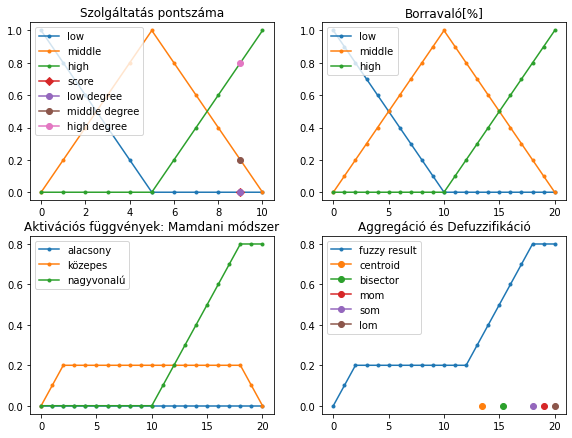

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# Problem: from service quality to tip amount
x_service = np.arange(0, 10.001, 1.0)
x_tip = np.arange(0, 20.001, 1.0)

# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 5])
service_middle = fuzz.trimf(x_service, [0, 5, 10])
service_high = fuzz.trimf(x_service, [5, 10, 10])

tip_low = fuzz.trimf(x_tip, [0, 0, 10])
tip_middle = fuzz.trimf(x_tip, [0, 10, 20])
tip_high = fuzz.trimf(x_tip, [10, 20, 20])

# Input: service score
score = 9.0
low_degree = fuzz.interp_membership(x_service, service_low, score)
middle_degree = fuzz.interp_membership(x_service, service_middle, score)
high_degree = fuzz.interp_membership(x_service, service_high, score)
print('alacsony tags√°gi √©rt√©k   = ', low_degree)
print('k√∂zepes tags√°gi √©rt√©k    = ', middle_degree)
print('nagyvonal√∫ tags√°gi √©rt√©k = ', high_degree)

# Whole config
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))
row = 2
col = 2

plt.subplot(row, col, 1)
plt.title("Szolg√°ltat√°s pontsz√°ma")
plt.plot(x_service, service_low, label="low", marker=".")
plt.plot(x_service, service_middle, label="middle", marker=".")
plt.plot(x_service, service_high, label="high", marker=".")
plt.plot(score, 0.0, label="score", marker="D")
plt.plot(score, low_degree, label="low degree", marker="o")
plt.plot(score, middle_degree, label="middle degree", marker="o")
plt.plot(score, high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("Borraval√≥[%]")
plt.plot(x_tip, tip_low, label="low", marker=".")
plt.plot(x_tip, tip_middle, label="middle", marker=".")
plt.plot(x_tip, tip_high, label="high", marker=".")
plt.legend(loc="upper left")

# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) low_degree <-> tip_low
# 2) middle_degree <-> tip_middle
# 3) high_degree <-> tip_high
activation_low = np.fmin(low_degree, tip_low)
activation_middle = np.fmin(middle_degree, tip_middle)
activation_high = np.fmin(high_degree, tip_high)

plt.subplot(row, col, 3)
plt.title("Aktiv√°ci√≥s f√ºggv√©nyek: Mamdani m√≥dszer")
plt.plot(x_tip, activation_low, label="alacsony", marker=".")
plt.plot(x_tip, activation_middle, label="k√∂zepes", marker=".")
plt.plot(x_tip, activation_high, label="nagyvonal√∫", marker=".")
plt.legend(loc="upper left")

print('activation alacsony = ', activation_low)
print('activation k√∂z√©p = ', activation_middle)
print('activation nagyvonal√∫ = ', activation_high)

# Apply the rules:
# * max for aggregation, like or the cases
aggregated = np.fmax(
    activation_low,
    np.fmax(activation_middle, activation_high))

# Defuzzification
tip_centroid = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_bisector = fuzz.defuzz(x_tip, aggregated, 'bisector')
tip_mom = fuzz.defuzz(x_tip, aggregated, "mom")
tip_som = fuzz.defuzz(x_tip, aggregated, "som")
tip_lom = fuzz.defuzz(x_tip, aggregated, "lom")

plt.subplot(row, col, 4)
plt.title("Aggreg√°ci√≥ √©s Defuzzifik√°ci√≥")
plt.plot(x_tip, aggregated, label="fuzzy result", marker=".")
plt.plot(tip_centroid, 0.0, label="centroid", marker="o")
plt.plot(tip_bisector, 0.0, label="bisector", marker="o")
plt.plot(tip_mom, 0.0, label="mom", marker="o")
plt.plot(tip_som, 0.0, label="som", marker="o")
plt.plot(tip_lom, 0.0, label="lom", marker="o")
plt.legend(loc="upper left")

plt.show()

<a name="pelda2"></a>

[vissza a tartalomhoz](#tartalom)

# P√©lda 2

IF cpu[alacsony] OR ram[alacsony] THEN change[decrease]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF cpu[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF ram[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
change  : 1.7559614442375242
----------------------------------------
cpu : 80
ram : 40



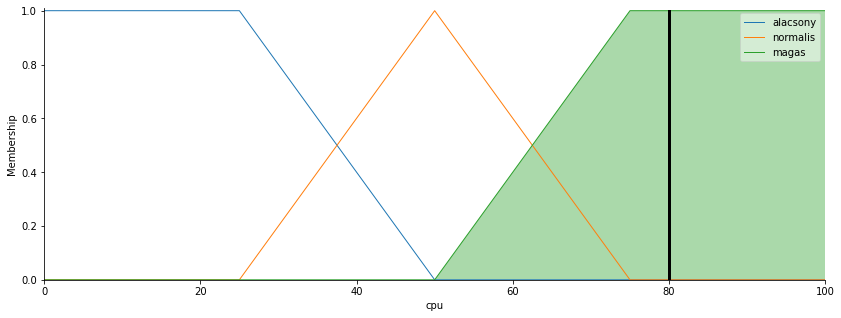

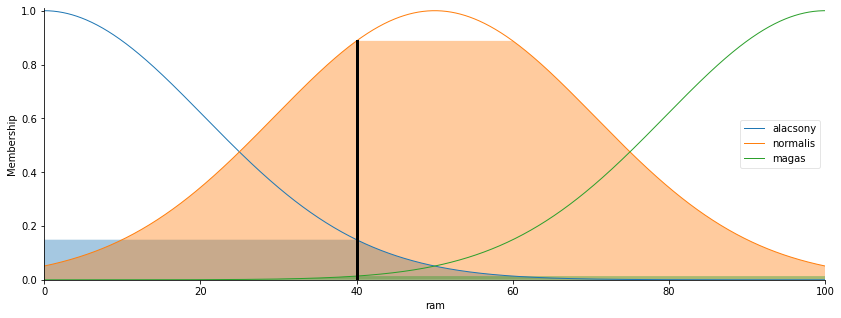

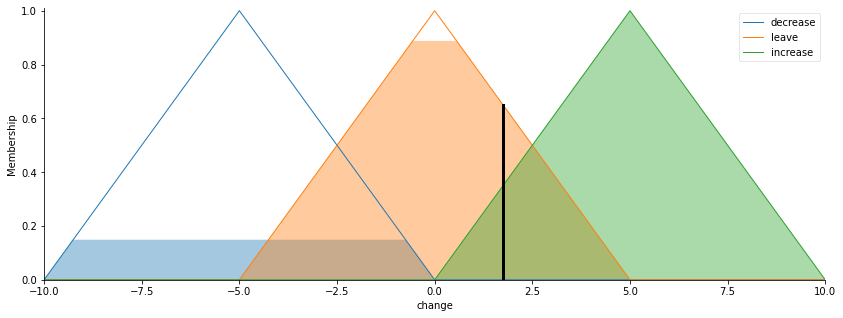

In [ ]:
cpu_ = 80
ram_ = 40

plt.rcParams["figure.figsize"] = (14,5)

CPU         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'cpu')

RAM         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'ram')

Change      = ctrl.Consequent(np.arange(-10, 10.1, 0.1), 'change')

CPU['alacsony']   = fuzzy.trapmf(CPU.universe, [0, 0, 25, 50])
CPU['normalis']   = fuzzy.trimf(CPU.universe, [25, 50, 75])
CPU['magas']  = fuzzy.trapmf(CPU.universe, [50, 75, 100, 100])

RAM['alacsony']   = fuzzy.gaussmf(RAM.universe, 0, 20.5)
RAM['normalis']   = fuzzy.gaussmf(RAM.universe, 50, 20.5)
RAM['magas']  = fuzzy.gaussmf(RAM.universe, 100, 20.5)

Change['decrease'] = fuzzy.trimf(Change.universe, [-10, -5, 0])
Change['leave']    = fuzzy.trimf(Change.universe, [-5, 0, 5])
Change['increase'] = fuzzy.trimf(Change.universe, [0, 5, 10])

# CPU.view()
# RAM.view()
# Change.view()

# Most k√©sz√≠ts√ºk el a szab√°lyokat

rule1 = ctrl.Rule(antecedent= CPU['alacsony'] | RAM['alacsony'], consequent = Change['decrease'])

rule2 = ctrl.Rule(antecedent= CPU['normalis'], consequent = Change['leave'])
rule3 = ctrl.Rule(antecedent= RAM['normalis'], consequent = Change['leave'])

rule4 = ctrl.Rule(antecedent= CPU['magas'] | RAM['magas'], consequent = Change['increase'])


# a szab√°lyok
print(rule1); print(rule2); print(rule3)

# h√°rom szab√°lyunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['cpu'] = cpu_
simulation.input['ram'] = ram_

simulation.compute()

print('----------------------------------------')
print('change  :', simulation.output['change'])
print('----------------------------------------')
print(simulation.input)

sim = simulation

CPU.view(sim = simulation)
RAM.view(sim = simulation)
Change.view(sim = simulation)


IF cpu[alacsony] OR ram[alacsony] THEN change[decrease]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF cpu[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF ram[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
change  : 2.3020136626415297
----------------------------------------
cpu : 60
ram : 40



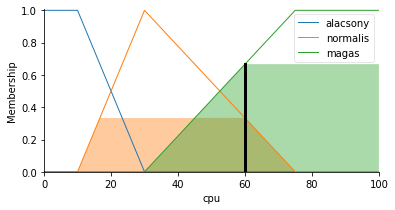

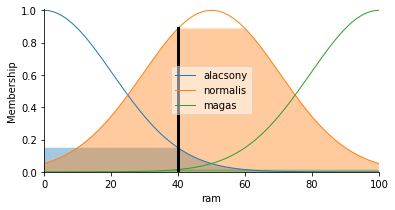

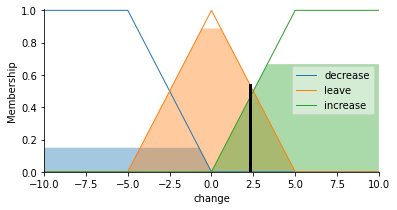

In [ ]:
cpu_ = 60
ram_ = 40

plt.rcParams["figure.figsize"] = (6,3)

CPU         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'cpu')

RAM         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'ram')

Change      = ctrl.Consequent(np.arange(-10, 10.1, 0.1), 'change')

CPU['alacsony']   = fuzzy.trapmf(CPU.universe, [0, 0, 10, 30])
CPU['normalis']   = fuzzy.trimf(CPU.universe, [10, 30, 75])
CPU['magas']  = fuzzy.trapmf(CPU.universe, [30, 75, 100, 100])

RAM['alacsony']   = fuzzy.gaussmf(RAM.universe, 0, 20.5)
RAM['normalis']   = fuzzy.gaussmf(RAM.universe, 50, 20.5)
RAM['magas']  = fuzzy.gaussmf(RAM.universe, 100, 20.5)

Change['decrease'] = fuzzy.trapmf(Change.universe, [-10, -10, -5, 0])
Change['leave']    = fuzzy.trimf(Change.universe, [-5, 0, 5])
Change['increase'] = fuzzy.trapmf(Change.universe, [0, 5, 10, 10])

# CPU.view()
# RAM.view()
# Change.view()

# Most k√©sz√≠ts√ºk el a szab√°lyokat

rule1 = ctrl.Rule(antecedent= CPU['alacsony'] | RAM['alacsony'], consequent = Change['decrease'])

rule2 = ctrl.Rule(antecedent= CPU['normalis'], consequent = Change['leave'])
rule3 = ctrl.Rule(antecedent= RAM['normalis'], consequent = Change['leave'])

rule4 = ctrl.Rule(antecedent= CPU['magas'] | RAM['magas'], consequent = Change['increase'])


# a szab√°lyok
print(rule1); print(rule2); print(rule3)

# h√°rom szab√°lyunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['cpu'] = cpu_
simulation.input['ram'] = ram_

simulation.compute()

print('----------------------------------------')
print('change  :', simulation.output['change'])
print('----------------------------------------')
print(simulation.input)

sim = simulation

CPU.view(sim = simulation)
RAM.view(sim = simulation)
Change.view(sim = simulation)


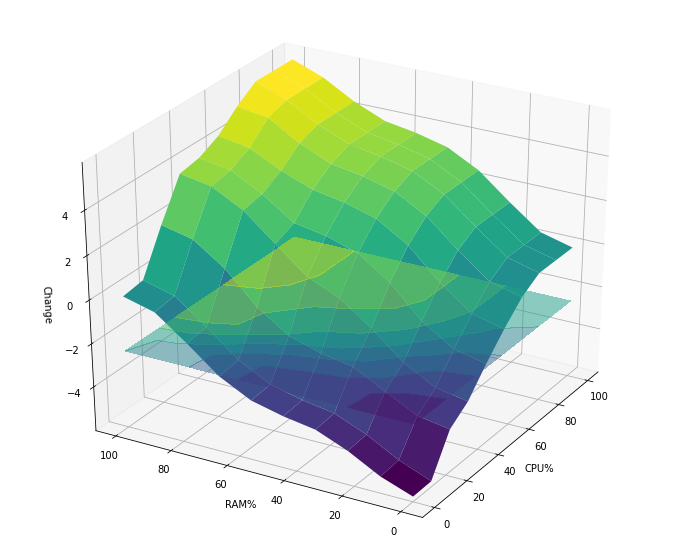

In [ ]:
# Ez ki√©rt√©kel√©s nagyobb felbont√°ssal is elv√©gezhet≈ë te t√∂bb sz√°m√≠t√°ssal j√°r

step = 10

cpu_space = np.linspace(0, 100, step)
ram_space = np.linspace(0, 100, step)
x, y = np.meshgrid(cpu_space, ram_space)
z = np.zeros_like(x)

# Kisz√°m√≠tjuk a rendszer kimeneteti √©rt√©k√©t a k√©t bemeneti v√°ltoz√≥ f√ºggv√©ny√©ben
for i in range(step):
  for j in range(step):
    sim.input['cpu'] = x[i, j]
    sim.input['ram'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['change']

# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('CPU%')
ax.set_ylabel('RAM%')
ax.set_zlabel('Change')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)

<a name="pelda3"></a>

[vissza a tartalomhoz](#tartalom)

# P√©lda 3

In [ ]:
plt.rcParams["figure.figsize"] = (14,5)

In [ ]:
# Create universe

√âtel         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')

Felszolg√°l√°s = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')

Borraval√≥    = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

In [ ]:
Borraval√≥.defuzzify_method = 'centroid'
Borraval√≥.universe.mean()

15.0

No handles with labels found to put in legend.


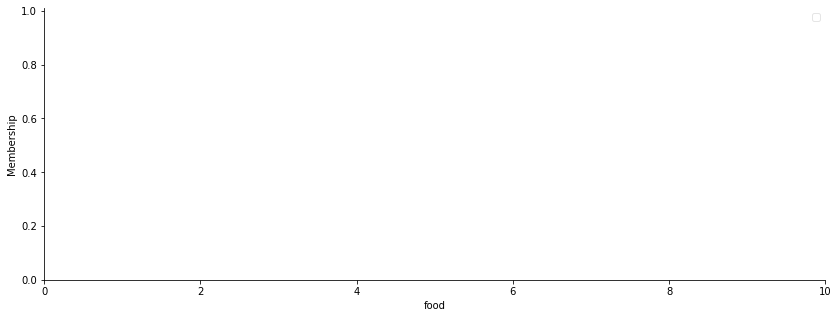

In [ ]:
√âtel.view()

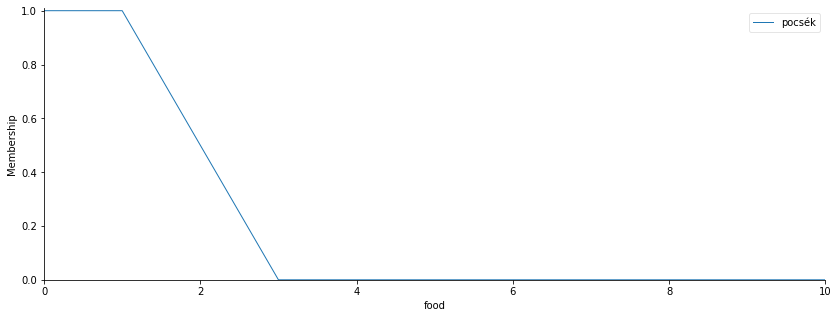

In [ ]:
# Hat√°rozzuk meg a tags√°gi f√ºggv√©nyeket (ez esetben most a felh≈ëtakar√≥{napos})

√âtel['pocs√©k'] = fuzzy.trapmf(√âtel.universe, [0, 0, 1, 3])

√âtel.view()

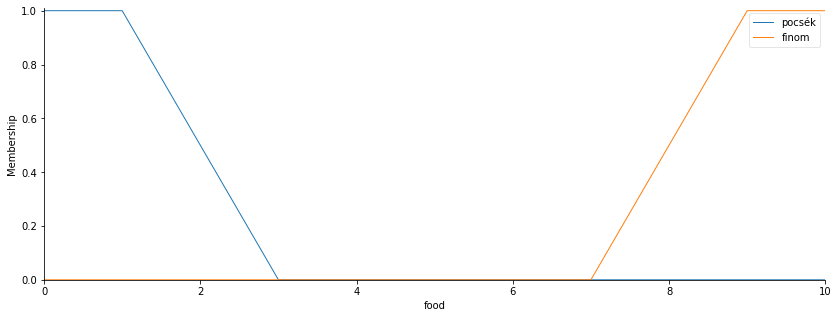

In [ ]:
# Hat√°rozzuk meg a tags√°gi f√ºggv√©nyeket (ez esetben most a felh≈ëtakar√≥{felh≈ës})

√âtel['finom'] = fuzzy.trapmf(√âtel.universe, [7, 9, 10, 10])

√âtel.view()

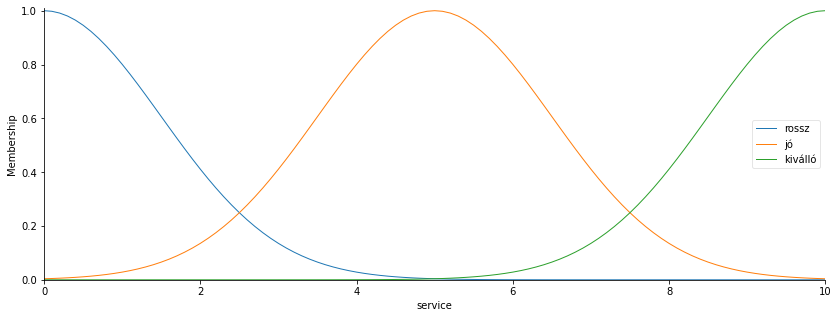

In [ ]:
# Eddig megvagyunk a √âtel v√°ltoz√≥ tags√°gi f≈±ggv√©nyeivel {pocs√©k, finom}

# Most k√©sz√≠ts√ºk el a Felszolg√°l√°s tags√°gi f√ºggv√©nyeit is {rossz, j√≥, kiv√°ll√≥}

# Felszolg√°l√°s['rossz']   = fuzzy.zmf(Felszolg√°l√°s.universe, 0, 5)

Felszolg√°l√°s['rossz']   = fuzzy.gaussmf(Felszolg√°l√°s.universe, 0, 1.5)

Felszolg√°l√°s['j√≥']      = fuzzy.gaussmf(Felszolg√°l√°s.universe, 5, 1.5)

# Felszolg√°l√°s['kiv√°ll√≥'] = fuzzy.smf(Felszolg√°l√°s.universe, 5, 10)

Felszolg√°l√°s['kiv√°ll√≥'] = fuzzy.gaussmf(Felszolg√°l√°s.universe, 10, 1.5)

Felszolg√°l√°s.view()

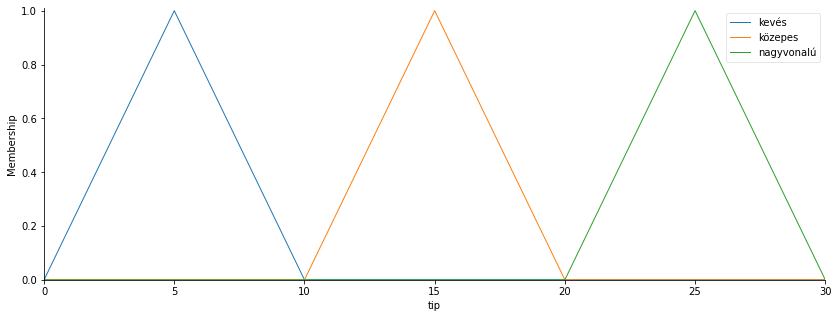

In [ ]:
# Most k√©sz√≠ts√ºk el a Borraval√≥ v√°ltoz√≥ tags√°gi f√ºggvy√©nyeit is {kev√©s, k√∂zepes, nagyvonal√∫}

Borraval√≥['kev√©s']      = fuzzy.trimf(Borraval√≥.universe, [0, 5, 10])
Borraval√≥['k√∂zepes']    = fuzzy.trimf(Borraval√≥.universe, [10, 15, 20])
Borraval√≥['nagyvonal√∫'] = fuzzy.trimf(Borraval√≥.universe, [20, 25, 30])

Borraval√≥.view()

In [ ]:
# Most k√©sz√≠ts√ºk el a szab√°lyokat

rule1 = ctrl.Rule(antecedent= Felszolg√°l√°s['rossz'] | √âtel['pocs√©k'], consequent = Borraval√≥['kev√©s'])

rule2 = ctrl.Rule(antecedent= Felszolg√°l√°s['j√≥'], consequent = Borraval√≥['k√∂zepes'])

rule3 = ctrl.Rule(antecedent= Felszolg√°l√°s['kiv√°ll√≥'] | √âtel['finom'], consequent = Borraval√≥['nagyvonal√∫'])


In [ ]:
def fuzzyDemo(Felszolg√°l√°s_ = 3, √âtel_ = 8):

  # rule1 = setRules(Type)

  # a szab√°lyok
  print(rule1)
  print(rule2)
  print(rule3)

  # k√©t szab√°lyunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['service'] = Felszolg√°l√°s_
  simulation.input['food'] = √âtel_

  simulation.compute()

  print('----------------------------------------')
  print('borraval√≥  :', simulation.output['tip'])
  print('----------------------------------------')
  print(simulation.input)

  Felszolg√°l√°s.view(sim = simulation)
  √âtel.view(sim = simulation)
  Borraval√≥.view(sim = simulation)

  return simulation


## Igy is vissza lehet kapni az adott bemenet tags√°ggi f√ºggv√©nyhez tartoz√≥ √©rt√©k√©t

In [ ]:
print(Felszolg√°l√°s.universe.shape)

# Felszolg√°l√°s['j√≥'] = fuzzy.gaussmf(Felszolg√°l√°s.universe, 5, 1.5)
mfx = fuzzy.gaussmf(Felszolg√°l√°s.universe, 5, 1.5)
print(mfx.shape)

# mik a tags√°ggi f√ºggv√©nyhez tartoz√≥ √©rt√©kek a k√∂vetkez pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(Felszolg√°l√°s.universe, mfx, [1.0, 2.0, 3.5, 5.0])

(101,)
(101,)


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [ ]:
print(Felszolg√°l√°s.__len__())
print(Felszolg√°l√°s.__getitem__('j√≥'))
a = Felszolg√°l√°s.__getitem__('j√≥')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# El√©g bonyolultan de le lehet h√≠vni Felszolg√°l√°s objektumb√≥l a mag√°t a tags√°gi f√ºggv√©nyt (mf)
fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('j√≥').mf, [1, 2, 3.5, 5])

101
service[j√≥]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [ ]:
# ide k√©ne egy olyan plotot raknom ami mutatja az adott f√ºggv√©nyt, √©s mutatja az egyes x, hez tartoz√≥ √©rt√©ket mink√©t (ha egyn√©l t√∂bb √°tviteli f√ºggv√©nyhez is tartozik az y)

OrderedDict([('rossz', service[rossz]), ('j√≥', service[j√≥]), ('kiv√°ll√≥', service[kiv√°ll√≥])])
Felszolg√°l√°s['rossz'](3) : 	0.14
Felszolg√°l√°s['j√≥'](3) : 	0.41
Felszolg√°l√°s['kiv√°ll√≥'](3) : 	0.00


Text(31, 0.41111229050718745, '0.41')

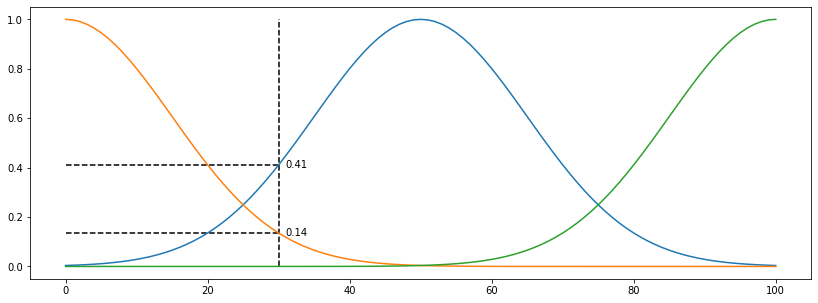

In [ ]:
plt.plot(Felszolg√°l√°s['j√≥'].mf)
plt.plot(Felszolg√°l√°s['rossz'].mf)
plt.plot(Felszolg√°l√°s['kiv√°ll√≥'].mf)

print(Felszolg√°l√°s.terms)

# El√©g bonyolultan de le lehet h√≠vni Felszolg√°l√°s objektumb√≥l a mag√°t a tags√°gi f√ºggv√©nyt (mf)
y_service_good    = fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('j√≥').mf, [3])
y_service_bad     = fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('rossz').mf, [3])
y_service_exelent = fuzzy.interp_membership(Felszolg√°l√°s.universe, Felszolg√°l√°s.__getitem__('kiv√°ll√≥').mf, [3])


print("Felszolg√°l√°s['rossz'](3) : \t{0:0.2f}".format(y_service_bad[0]))
print("Felszolg√°l√°s['j√≥'](3) : \t{0:0.2f}".format(y_service_good[0]))
print("Felszolg√°l√°s['kiv√°ll√≥'](3) : \t{0:0.2f}".format(y_service_exelent[0]))

plt.vlines(30, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_service_bad, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')
plt.hlines(y_service_good, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')

plt.text(31, y_service_bad[0], '{:0.2f}'.format(y_service_bad[0]), verticalalignment = 'center')
plt.text(31, y_service_good[0], '{:0.2f}'.format(y_service_good[0]), verticalalignment ='center')



In [ ]:
√âtel.terms

OrderedDict([('pocs√©k', food[pocs√©k]), ('finom', food[finom])])

In [ ]:
# El√©g bonyolultan de le lehet h√≠vni √âtel objektumb√≥l a mag√°t a tags√°gi f√ºggv√©nyt (mf)
fuzzy.interp_membership(√âtel.universe, √âtel.__getitem__('finom').mf, [8])

array([0.5])

In [ ]:
for key in √âtel.terms.keys():
  print(key)

pocs√©k
finom


√âtel['pocs√©k'](3) : 	0.00
√âtel['finom'](3) : 	0.50


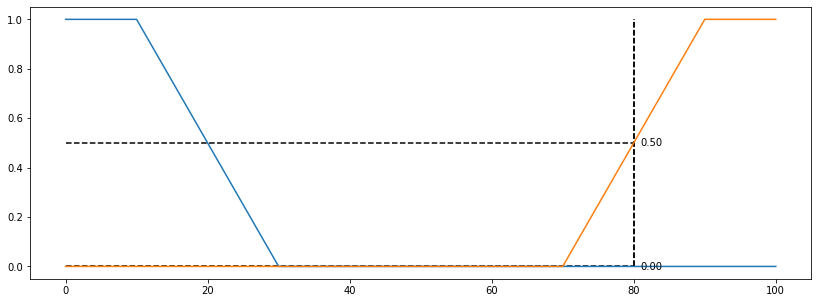

In [ ]:
for key in √âtel.terms.keys():
  plt.plot(√âtel[key].mf)

  value = fuzzy.interp_membership(√âtel.universe, √âtel.__getitem__(key).mf, [8])

  print("√âtel['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(80, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = 80, colors = 'k', linestyles = 'dashed')
  plt.text(81, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')




## A bemeneti v√°ltoz√≥k √©s a hozz√° tartoz√≥ √©rt√©keke a k√∂vetkez≈ëek



In [ ]:
# Teh√°t a bemeneti v√°ltoz√≥k √©s a hozz√° tartoz√≥ √©rt√©keke a k√∂vetkez≈ëek

# Felszolg√°l√°s = 3 -> Felszolg√°l√°s['rossz'](0.14) √©s Felszolg√°l√°s['j√≥'](0.41)

# √âtel = 8 -> √âtel['pocs√©k](0.00) √©s √âtel['finom'](0.5)

## Az aggreg√°ci√≥s szab√°lyok


In [ ]:
# Tekints√ºk most √°t a szab√°lyokat

# rule1 = ctrl.Rule(antecedent= Felszolg√°l√°s['rossz'] | √âtel['pocs√©k'], consequent = Borraval√≥['kev√©s'])

# Felszolg√°l√°s['rossz'](0.14) OR √âtel['pocs√©k'](0.00) -> Borraval√≥['kev√©s'] -> max(0.14, 0.00) = 0.14


# rule2 = ctrl.Rule(antecedent= Felszolg√°l√°s['j√≥'], consequent = Borraval√≥['k√∂zepes'])

# Felszolg√°l√°s['j√≥'](0.41) -> Borraval√≥['k√∂zepes'] = 0.41


# rule3 = ctrl.Rule(antecedent= Felszolg√°l√°s['kiv√°ll√≥'] | √âtel['finom'], consequent = Borraval√≥['nagyvonal√∫'])

# Felszolg√°l√°s['kiv√°ll√≥'](0.00) OR √âtel['finom'](0.5) -> Borraval√≥['nagyvonal√∫'] -> max(0.00, 0.50) = 0.50

## Aggreg√°ci√≥

In [ ]:

# Teh√°t a h√°rom szab√°ly alapj√°n a kimeneti v√°ltoz√≥ (Borraval√≥) mindh√°rom {kev√©s, k√∂zepes, nagyvonal√∫} tags√°gi f√ºggv√©ny akt√≠v lesz

# A fenti sz√°m√≠t√°sok alapj√°n a k√∂vetkez≈ë k√©pen

# rule1 -> Borraval√≥['kev√©s'] = 0.14
# rule2 -> Borraval√≥['k√∂zepes'] = 0.41
# rule3 -> Borravol√≥['nagyvonal√∫'] = 0.5


<a name="defuzzifikacio"></a>

## Defuzzifik√°ci√≥<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

###(Mamdani-style)

A leggyakrabban haszn√°lt de-fuzzyfik√°ci√≥s elj√°r√°s a k√∂z√©p√©rt√©k, vagy centroid m√≥dszer (center of gravity). Azt a pontot keresi meg, amely az aggreg√°lt ter√ºletet k√©t egyenl≈ë r√©szre bontja, a k√∂vetkez≈ë m√≥don:

$$ COG = \frac{\int_{a}^{b} \mu_A(x)x\ dx}{\int_{a}^{b} \mu_A(x)\ dx}$$

<br>


In [ ]:

# Borraval√≥ = w1 * COG(Borraval√≥['kev√©s']) + w2 * COG(Borraval√≥['k√∂zepes']) + w3 * COG(Borraval√≥['nagyvonal√∫']) / (w1 + w2 + w3)

# Borraval√≥ = ( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

# Borraval√≥ = 18.42

( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

18.42857142857143

## Interakt√≠v Demo

In [ ]:
f = interact(fuzzyDemo, Felszolg√°l√°s_ = (0, 10), √âtel_ = (0, 10));

interactive(children=(IntSlider(value=3, description='Felszolg√°l√°s_', max=10), IntSlider(value=8, description=‚Ä¶

In [ ]:
sim = f.widget.result

In [ ]:
type(sim)

skfuzzy.control.controlsystem.ControlSystemSimulation

In [ ]:
# a sim objektumb√≥l a v√©geredm√©nyt √≠gy lehetem visszakapni

# legf≈ëk√©ppen azt, hogy a Borraval√≥ objektum egyes tags√°gi f√ºggv√©nyein milyen √©rt√©kek vannak
# √©s azt, hogy a hozz√° tartoz√≥ √©rt√©k alapj√°n a k√ºl√∂nb√∂z≈ë f√ºggv√©ny alatti ter√ºlet sz√°m√≠t√°√°si m√≥dszerekkel
# (itt most csak COG) milyen de-fuzzyfik√°ci√≥s √©rt√©ket kap

In [ ]:
sim.output

OrderedDict([('tip', 18.00589051927782)])

## A teljes kimeneti t√©r √°br√°zol√°sa a k√©t bemeneti v√°ltoz√≥ f√ºggv√©ny√©ben

In [ ]:

# Ez ki√©rt√©kel√©s nagyobb felbont√°ssal is elv√©gezhet≈ë te t√∂bb sz√°m√≠t√°ssal j√°r

felszolgalas_space = np.linspace(0, 10, 10)
etel_space = np.linspace(0, 10, 10)
x, y = np.meshgrid(felszolgalas_space, etel_space)
z = np.zeros_like(x)


# Kisz√°m√≠tjuk a rendszer kimeneteti √©rt√©k√©t a k√©t bemeneti v√°ltoz√≥ f√ºggv√©ny√©ben
for i in range(10):
  for j in range(10):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

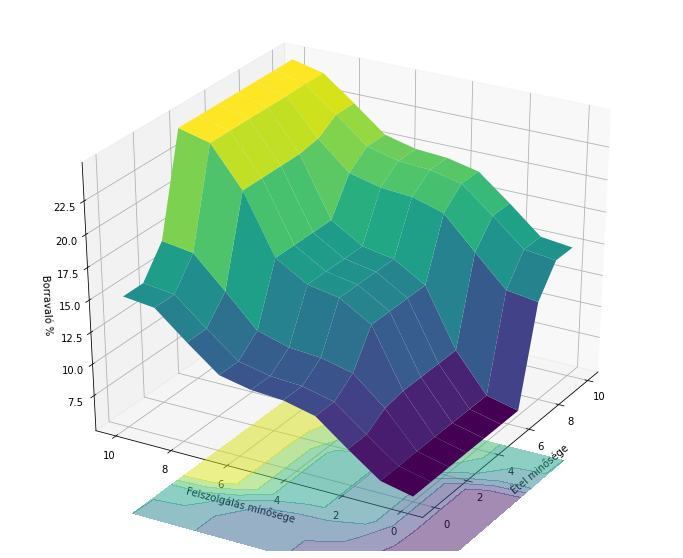

In [ ]:
# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('√âtel min≈ës√©ge')
ax.set_ylabel('Felszolg√°l√°s m√≠n≈ës√©ge')
ax.set_zlabel('Borraval√≥ %')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)

## Surface Graphic

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# A ki√©rt√©kel√©s nagyobb felbont√°ssal is elv√©gezhet≈ë de t√∂bb sz√°m√≠t√°ssal j√°r

service = np.linspace(0, 10, 20)
food    = np.linspace(0, 10, 20)

x, y = np.meshgrid(service, food)

z = np.zeros_like(x)

z.shape

(20, 20)

In [ ]:
# Az el≈ëz≈ën√©l nagyobb felbont√°sban, ugyan az kis√©rlet.

# A k√©t bemeneti v√°ltoz√≥t 20 egyenl≈ë l√©p√©sben vizsg√°lva az √∂sszes lehets√©ges
# kombin√°ci√≥ra kisz√°molt √©rt√©kek. Majd ezeket fogom √°br√°zolni egy 3 dimenzi√≥s
# interakt√≠v program seg√≠ts√©g√©vel

for i in range(len(service)):
  for j in range(len(food)):
    sim.input['service'] = x[i, j]
    sim.input['food'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

# Ez az √°br√°zol√°si m√≥d b√°r l√°tv√°nyos, kett≈ën√©l t√∂bb bemeneti v√°ltoz√≥n√°l
# t√∂bbet nem tudunk √°br√°zolni, √≠gy haszn√°lhat√≥s√°ga er≈ësen korl√°tozott.
# Az al√°bbi p√©ld√°t ink√°bb didaktikai c√©lb√≥l hoztam l√©tre

In [ ]:
%%capture
!pip install plotly
!pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot

In [ ]:
surface = go.Surface(x = x, y = y, z = z)
data = [surface]

fig = go.Figure(data = data)

fig.update_layout(title = 'A kimeneti v√°ltoz√≥ √©rt√©ke a k√©t bemeneti v√°ltoz√≥ f√ºggv√©ny√©ben', autosize=False,
                  width = 700, height = 500,
                  scene = dict(
                    xaxis_title = 'food',
                    yaxis_title = 'service',
                    zaxis_title = 'tip %'),
                  margin = dict(l = 65, r = 50, b = 65, t = 60))

fig.show()

<a name="todo"></a>

[vissza a tartalomhoz](#tartalom)

## ToDo

1. Tanul√≥ adatokon - X, y - √©rt√©kp√°rokon v√©gzett tan√≠t√°s √©s szab√°lyok kialak√≠t√°sa. Illetve a tanult adatokon visszaellen≈ërizni a rendszer pontoss√°g√°t. A tank√∂nyvben ezt a vizrendszer foszfortalm√°t m√©r≈ë p√©ld√°ban l√°that√≥.

2. A logikai alapm≈±veletek Fuzzy halmazokkal r√©szt √°br√°zolni is a k√∂nyebb meg√©rt√©s c√©lj√°b√≥l. Az √∂tletet a k√∂vetkez≈ë √°bra adta.

<img src="https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/kepek/8820/Slide16.GIF"> 


3. A fuzzy r√©szhalmaz fogalm√°t is √°br√°zolni tudom, hogy szeml√©letesebb legyen. Ezek az √°br√°k nekem is seg√≠tett√©k a meg√©rt√©st.


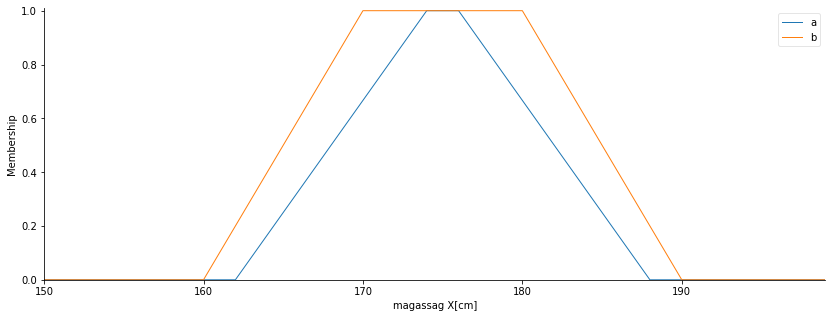

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

x                = np.arange(150, 200, 1)

v         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

v['a'] = fuzzy.trapmf(v.universe, [162, 174, 176, 188])
v['b'] = fuzzy.trapmf(v.universe, [160, 170, 180, 190])


v.view()

4. Fuzzy rendszerek m√©rn√∂ki megk√∂zel√≠t√©sben - 4. gyakorlat c√≠m≈± r√©szben van egy **simulink** nev≈± modul, amely a tags√°gi f√ºggv√©nyek param√©tereinek optimaliz√°l√°s√°t v√©gzi.<br><br>Ehhez hasonl√≥ megold√°st szertn√©k √©n is k√©sz√≠teni Pythonban.

5. **√ñsszetettebb rendszerek k√©sz√≠t√©se**, ahol egy Fuzzy rendszer kimenete egy k√∂vetkez≈ë Fuzzy rendszer bemenete lehet. Ez√°ltal egyes csoportokra k√ºl√∂n Fuzzy rendszereket √©p√≠thetek, amelyekb≈ël √∂ssze√°ll√≠tok egy mindenre √©rv√©nyes Fuzzy rendszert. A tank√∂nyvben ez az 5.gyakorlat c√≠m≈± r√©szben a k√ºlf√∂ldre utaz√°s p√©ld√°j√°n kereszt√ºl ker√ºtl bemutat√°sra.

6. A **kettes t√≠pus√∫ fuzzy halmazok** megismer√©se √©s √°br√°zol√°sa. Fuzzy-neur√°lis h√°l√≥zatok megismer√©se √©s √°br√°zol√°sa.

7. A **scilab** program megismer√©se, illetve az ott tal√°hat√≥ p√©ld√°kon √°t a t√©ma alaposabb meg√≠smer√©se √©s a felhaszn√°l√°si lehet≈ës√©gek √°ttekint√©se. https://www.scilab.org/tutorials



<a name="takagi_sugeno_rendszer"></a>

[vissza a tartalomhoz](#tartalom)

# Takagi-Sugeno rendszer <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Err≈ël a t√©m√°r√≥l szerettem volna b≈ëvebben is √≠rni √©s leprogramozni, de sajnos nem jutott r√° id≈ë. Pedig √©rdemes lenne foglalkozni vele.

R√∂viden saj√°t szavakkal, a ki√©rt√©kel√©si f√ºggv√©ny nem fuzzy hallmaz hanem valamilyen, vagy b√°rmilyen f√ºggv√©ny lehet.
1. Gyakorlatilag elker√ºlj√ºk a De-fuzzifik√°ci√≥t
2. Nagyon √©rdekes, constans, line√°ris, vagy nem line√°ris f√ºgv√©nyeket is k√©sz√≠thet√ºnk.
3. Pythonban nagyon k√∂nny≈± implement√°lni

-23.23809523809524


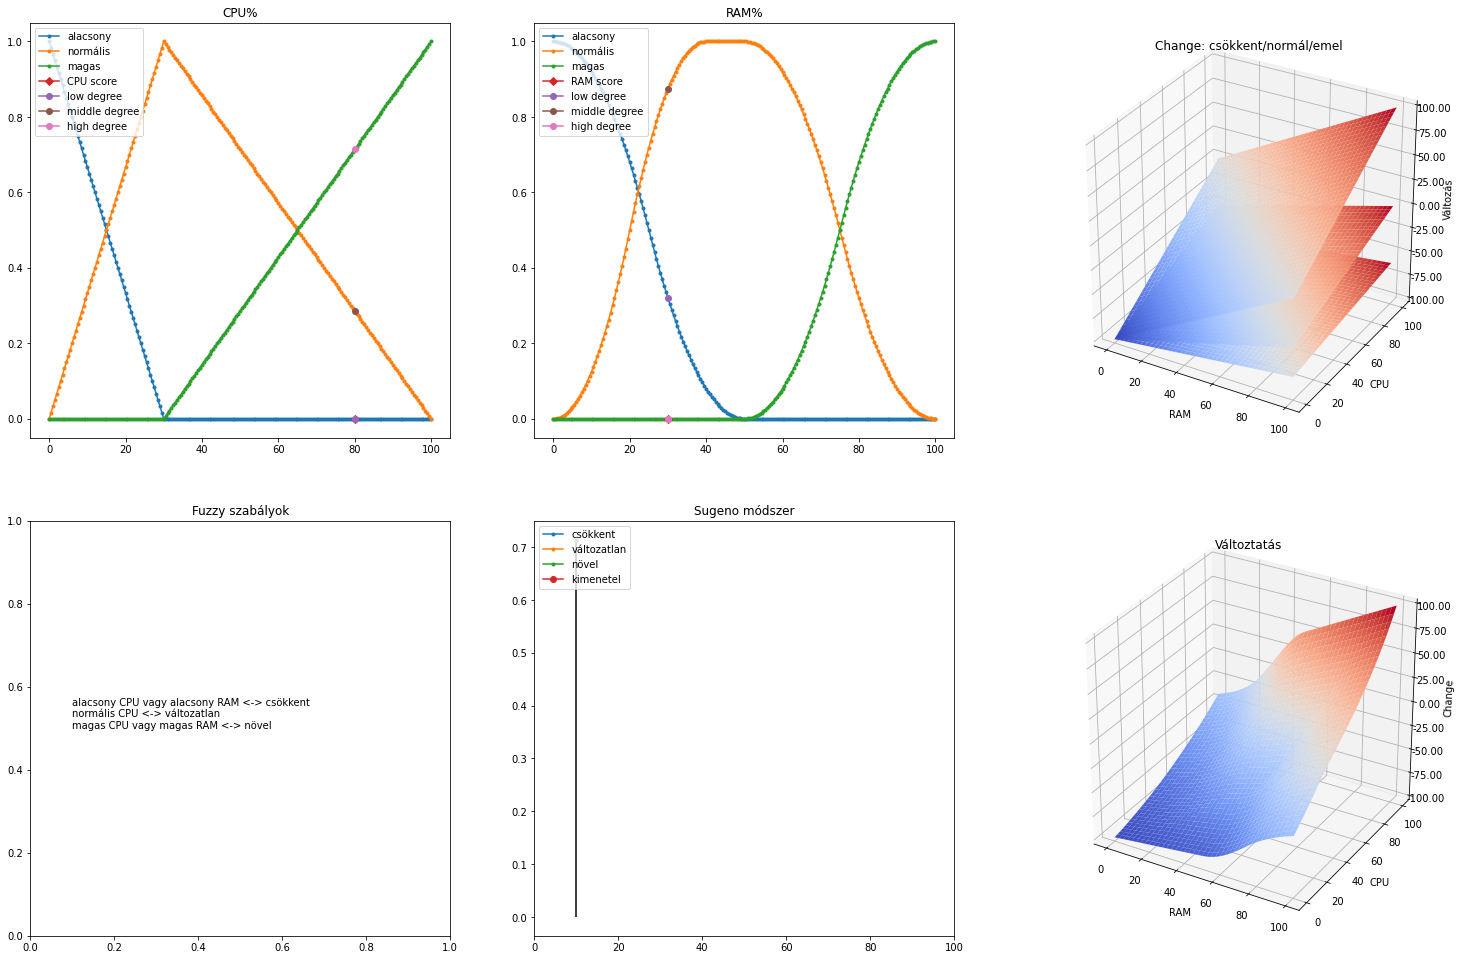

In [ ]:
#@title
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

# for flake8 check
Axes3D

# Problem: from service quality and food quality to tip amount
x_service = np.arange(0, 100.01, 0.5)
x_food = np.arange(0, 100.01, 0.5)
x_tip = np.arange(-10, 10.01, 1.0)

# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 30])
service_middle = fuzz.trimf(x_service, [0, 30, 100])
service_high = fuzz.trimf(x_service, [30, 100, 100])

food_low = fuzz.zmf(x_food, 0, 50)
food_middle = fuzz.pimf(x_food, 0, 40, 50, 100)
food_high = fuzz.smf(x_food, 50, 100)

# =======================================
# Sugeno Method: z = f(x, y)
# Tip equation: z = ax + by + c
"""
# should use 3D data
tip_low = -5.0 + x_service * 0.2 + x_food * 0.2
tip_middle = -5.0 + x_service * 0.5 + x_food * 0.5
tip_high = -5.0 + x_service * 1.0 + x_food * 1.0
x_tip = x_food
"""
f, s = np.meshgrid(x_food, x_service, indexing="ij")
alpha1 = -100.0
tip_low_grid = alpha1 + s * 0.2 + f * 0.2
tip_middle_grid = alpha1 + s * 0.5 + f * 0.5
tip_high_grid = alpha1 + s + f

# Input: service score and food score
service_score = 80
food_score = 30

service_low_degree = fuzz.interp_membership(
    x_service, service_low, service_score)
service_middle_degree = fuzz.interp_membership(
    x_service, service_middle, service_score)
service_high_degree = fuzz.interp_membership(
    x_service, service_high, service_score)

food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree = fuzz.interp_membership(x_food, food_middle, food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

# Whole config
fig_scale_x = 4.0
fig_scale_y = 3.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("CPU%")
plt.plot(x_service, service_low, label="alacsony", marker=".")
plt.plot(x_service, service_middle, label="norm√°lis", marker=".")
plt.plot(x_service, service_high, label="magas", marker=".")
plt.plot(service_score, 0.0, label="CPU score", marker="D")
plt.plot(service_score, service_low_degree, label="low degree", marker="o")
plt.plot(service_score, service_middle_degree, label="middle degree", marker="o")
plt.plot(service_score, service_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("RAM%")
plt.plot(x_food, food_low, label="alacsony", marker=".")
plt.plot(x_food, food_middle, label="norm√°lis", marker=".")
plt.plot(x_food, food_high, label="magas", marker=".")
plt.plot(food_score, 0.0, label="RAM score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

# =======================================
# z = f(x, y)
"""
# should use 3D display
plt.subplot(row, col, 3)
plt.title("Tip")
plt.plot(x_tip, tip_low, label="low", marker=".")
plt.plot(x_tip, tip_middle, label="middle", marker=".")
plt.plot(x_tip, tip_high, label="high", marker=".")
plt.legend(loc="upper left")
"""
ax3 = fig.add_subplot(row, col, 3, projection="3d")
plt.title("Change: cs√∂kkent/norm√°l/emel")

ax3.set_xlabel("RAM")
ax3.set_ylabel("CPU")
ax3.set_zlabel("V√°ltoz√°s")
ax3.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf1 = ax3.plot_surface(f, s, tip_low_grid, cmap=cm.coolwarm, linewidth=0)
surf2 = ax3.plot_surface(f, s, tip_middle_grid, cmap=cm.coolwarm, linewidth=0)
surf3 = ax3.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) low_degree <-> tip_low
# 2) middle_degree <-> tip_middle
# 3) high_degree <-> tip_high

# =======================================
# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)

plt.subplot(row, col, 4)
plt.title("Fuzzy szab√°lyok")
t = ("alacsony CPU vagy alacsony RAM <-> cs√∂kkent\n"
     "norm√°lis CPU <-> v√°ltozatlan\n"
     "magas CPU vagy magas RAM <-> n√∂vel")
plt.text(0.1, 0.5, t)

plt.subplot(row, col, 5)
plt.title("Sugeno m√≥dszer")

# Apply the equaltion:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = alpha1 + 0.2 * food_score + 0.2 * service_score
z2 = alpha1 + 0.5 * food_score + 0.5 * service_score
z3 = alpha1 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

plt.plot(z1, w1, label="cs√∂kkent", marker=".")
plt.xlim(0, 100)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="v√°ltozatlan", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="n√∂vel", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="kimenetel", marker="o")
plt.legend(loc="upper left")

# =======================================
ax6 = fig.add_subplot(row, col, 6, projection="3d")
plt.title("V√°ltoztat√°s")

for i in range(0, len(f)):
    for j in range(0, len(s)):
        x = f[i, j]
        y = s[i, j]
        f_low_degree = fuzz.interp_membership(x_food, food_low, x)
        f_middle_degree = fuzz.interp_membership(x_food, food_middle, x)
        f_high_degree = fuzz.interp_membership(x_food, food_high, x)

        s_low_degree = fuzz.interp_membership(x_service, service_low, y)
        s_middle_degree = fuzz.interp_membership(x_service, service_middle, y)
        s_high_degree = fuzz.interp_membership(x_service, service_high, y)

        w1 = np.fmax(s_low_degree, f_low_degree)
        w2 = s_middle_degree
        w3 = np.fmax(s_high_degree, f_high_degree)

        tip_high_grid[i, j] = (w1 * tip_low_grid[i, j]
                               + w2 * tip_middle_grid[i, j]
                               + w3 * tip_high_grid[i, j]) / (w1 + w2 + w3)

ax6.set_xlabel("RAM")
ax6.set_ylabel("CPU")
ax6.set_zlabel("Change")
ax6.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf6 = ax6.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

plt.show()

## Nem fuzzy megk√∂zel√≠t√©s

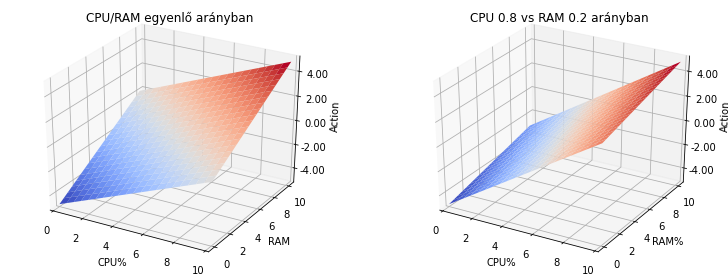

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

# Axes3D


# ---------------------------------------------------------------------------
# Var set
cpu = np.arange(0, 10.01, 0.5)
ram = np.arange(0, 10.01, 0.5)
f, s = np.meshgrid(cpu, ram, indexing="ij")

# ---------------------------------------------------------------------------
# Plot configuration
row = 1
col = 2

fig = plt.figure(figsize=(6.4 * 2, 2.4 * 2))



# ---------------------------------------------------------------------------
# Plot 1
ax = fig.add_subplot(row, col, 1, projection="3d")
plt.title("CPU/RAM egyenl≈ë ar√°nyban")

action = (0.5) * (s + f) - 5

ax.set_xlabel("CPU%")
ax.set_xlim(0, 10)
ax.set_ylabel("RAM")
ax.set_xlim(0, 10)
ax.set_zlabel("Action")
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf = ax.plot_surface(s, f, action, cmap=cm.coolwarm, linewidth=0)



# ---------------------------------------------------------------------------
# Plot 2
ax2 = fig.add_subplot(row, col, 2, projection="3d")
plt.title("CPU 0.8 vs RAM 0.2 ar√°nyban")

cpu_ratio = 0.8
action = (cpu_ratio * (0.2 * s + 5) + (1 - cpu_ratio) * (0.2 * f - 5)) *5 - 20

ax2.set_xlabel("CPU%")
ax2.set_xlim(0, 10)
ax2.set_ylabel("RAM%")
ax2.set_xlim(0, 10)
ax2.set_zlabel("Action")
ax2.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf2 = ax2.plot_surface(s, f, action, cmap=cm.coolwarm, linewidth=0)


plt.show()

## Mamdami megold√°s

In [ ]:
%%capture
!pip install scikit-fuzzy

action centroid deffuzzification = 4.67
action bisector defuzz		 = 6.25
action mean of maximum		 = 9.50
action minimum of maximum	 = 9.00
action maximum of maximum	 = 10.00


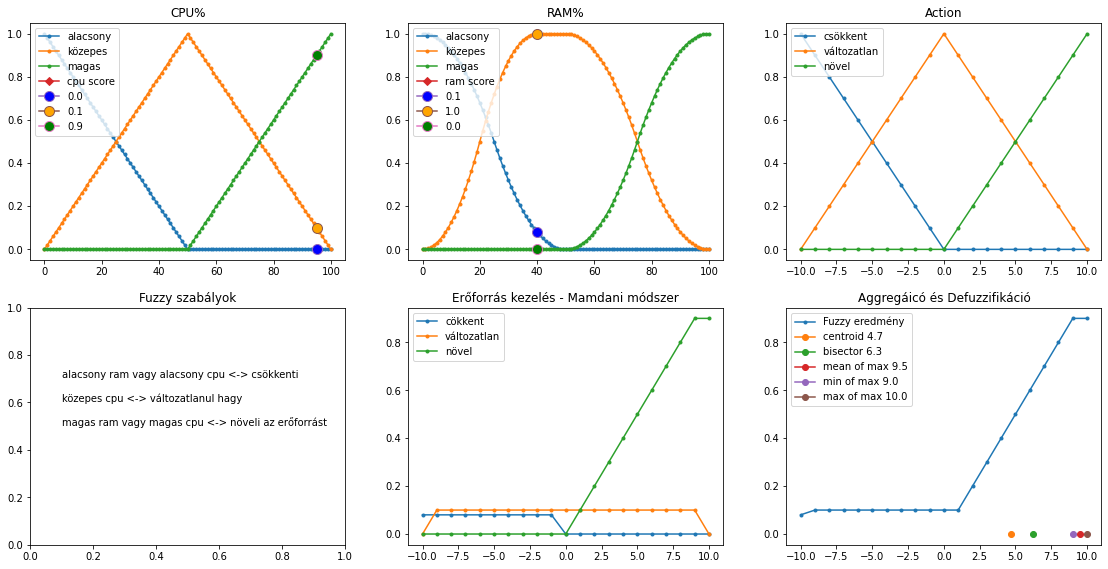

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from matplotlib import pyplot as plt

# A CPU √©s a RAM kihaszn√°lts√°g f√ºggv√©ny√©ben a hozz√°adand√≥ eszk√∂z√∂k sz√°ma
x_cpu    = np.arange(0, 100.01, 1.0)
x_ram    = np.arange(0, 100.01, 1.0)
x_action = np.arange(-10, 10.01, 1.0)

# Tags√°gi f√ºggv√©nyek
cpu_low    = fuzzy.trimf(x_cpu, [0, 0, 50])
cpu_middle = fuzzy.trimf(x_cpu, [0, 50, 100])
cpu_high   = fuzzy.trimf(x_cpu, [50, 100, 100])

ram_low    = fuzzy.zmf(x_ram, 0, 50)
ram_middle = fuzzy.pimf(x_ram, 0, 40, 50, 100)
ram_high   = fuzzy.smf(x_ram, 50, 100)

action_decrease = fuzzy.trimf(x_action, [-10, -10, 0])
action_leave    = fuzzy.trimf(x_action, [-10, 0, 10])
action_increase = fuzzy.trimf(x_action, [0, 10, 10])

# Bemenetek, CPU 95, RAM 40
cpu_score = 95
ram_score = 40

cpu_low_degree = fuzzy.interp_membership(
    x_cpu, cpu_low, cpu_score)
cpu_middle_degree = fuzzy.interp_membership(
    x_cpu, cpu_middle, cpu_score)
cpu_high_degree = fuzzy.interp_membership(
    x_cpu, cpu_high, cpu_score)

ram_low_degree    = fuzzy.interp_membership(x_ram, ram_low, ram_score)
ram_middle_degree = fuzzy.interp_membership(x_ram, ram_middle, ram_score)
ram_high_degree   = fuzzy.interp_membership(x_ram, ram_high, ram_score)

# ---------------------------------------------------------------------
# Plot configuration
fig_scale_x = 3.0
fig_scale_y = 2.0
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3
markersize = 10
markerfacecolor = 'black'

plt.subplot(row, col, 1)
plt.title("CPU%")
plt.plot(x_cpu, cpu_low, label="alacsony", marker=".")
plt.plot(x_cpu, cpu_middle, label="k√∂zepes", marker=".")
plt.plot(x_cpu, cpu_high, label="magas", marker=".")
plt.plot(cpu_score, 0.0, label="cpu score", marker="D")
plt.plot(cpu_score, cpu_low_degree,
         label="{:.1f}".format(cpu_low_degree),
         marker="o", markersize=markersize, markerfacecolor='blue')
plt.plot(cpu_score, cpu_middle_degree,
         label="{:.1f}".format(cpu_middle_degree),
         marker="o", markersize=markersize, markerfacecolor='orange')
plt.plot(cpu_score, cpu_high_degree,
         label="{:.1f}".format(cpu_high_degree),
         marker="o", markersize=markersize, markerfacecolor='green')
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("RAM%")
plt.plot(x_ram, ram_low, label="alacsony", marker=".")
plt.plot(x_ram, ram_middle, label="k√∂zepes", marker=".")
plt.plot(x_ram, ram_high, label="magas", marker=".")
plt.plot(ram_score, 0.0, label="ram score", marker="D")
plt.plot(ram_score, ram_low_degree,
         label="{:.1f}".format(ram_low_degree),
         marker="o", markersize=markersize, markerfacecolor='blue')
plt.plot(ram_score, ram_middle_degree,
         label="{:.1f}".format(ram_middle_degree),
         marker="o", markersize=markersize, markerfacecolor='orange')
plt.plot(ram_score, ram_high_degree,
         label="{:.1f}".format(ram_high_degree),
         marker="o", markersize=markersize, markerfacecolor='green')
plt.legend(loc="upper left")

plt.subplot(row, col, 3)
plt.title("Action")
plt.plot(x_action, action_decrease, label="cs√∂kkent", marker=".")
plt.plot(x_action, action_leave, label="v√°ltozatlan", marker=".")
plt.plot(x_action, action_increase, label="n√∂vel", marker=".")
plt.legend(loc="upper left")

# =======================================
# Mamdani (max-min) m√≥dszer:
# hozz√°rendel√©sek
# * min mert a logika 'and' kapcsolat.
# 1) low_degree <-> action_decrease
# 2) middle_degree <-> action_leave
# 3) high_degree <-> action_increase

# =======================================
# alacsony ram OR alacsony cpu
low_degree = np.fmax(cpu_low_degree, ram_low_degree)
# k√∂zepes cpu
middle_degree = cpu_middle_degree
# magas ram OR magas cpu
high_degree = np.fmax(cpu_high_degree, ram_high_degree)

plt.subplot(row, col, 4)
plt.title("Fuzzy szab√°lyok")
t = ("alacsony ram vagy alacsony cpu <-> cs√∂kkenti\n\n"
     "k√∂zepes cpu <-> v√°ltozatlanul hagy\n\n"
     "magas ram vagy magas cpu <-> n√∂veli az er≈ëforr√°st")
plt.text(0.1, 0.5, t)

activation_low = np.fmin(low_degree, action_decrease)
activation_middle = np.fmin(middle_degree, action_leave)
activation_high = np.fmin(high_degree, action_increase)

plt.subplot(row, col, 5)
plt.title("Er≈ëforr√°s kezel√©s - Mamdani m√≥dszer")

plt.plot(x_action, activation_low, label="c√∂kkent", marker=".")
plt.plot(x_action, activation_middle, label="v√°ltozatlan", marker=".")
plt.plot(x_action, activation_high, label="n√∂vel", marker=".")
plt.legend(loc="upper left")

# Aggreg√°ci√≥s szab√°lyok:
# * max az aggreg√°ci√≥hoz, mivel a kapcsolat 'vagy' (nem '√©s')
# A h√°rom tags√°gi f√ºggv√©ny √©rt√©ke k√∂z√ºl a maximumot fogja figyelembe venni
aggregated = np.fmax(
    activation_low,
    np.fmax(activation_middle, activation_high))

# Defuzzifik√°ci√≥
# T√∂bbf√©le defuzzifik√°ci√≥s m√≥dszert is deffini√°lok
action_centroid = fuzzy.defuzz(x_action, aggregated, 'centroid')
action_bisector = fuzzy.defuzz(x_action, aggregated, 'bisector')
action_mom = fuzzy.defuzz(x_action, aggregated, "mom")
action_som = fuzzy.defuzz(x_action, aggregated, "som")
action_lom = fuzzy.defuzz(x_action, aggregated, "lom")

print('action centroid deffuzzification = {:.2f}'.format(action_centroid))
print('action bisector defuzz\t\t = {:.2f}'.format(action_bisector))
print('action mean of maximum\t\t = {:.2f}'.format(action_mom))
print('action minimum of maximum\t = {:.2f}'.format(action_som))
print('action maximum of maximum\t = {:.2f}'.format(action_lom))

plt.subplot(row, col, 6)
plt.title("Aggreg√°ic√≥ √©s Defuzzifik√°ci√≥")
plt.plot(x_action, aggregated, label="Fuzzy eredm√©ny", marker=".")
plt.plot(action_centroid, 0.0, marker="o",
         label="centroid {:.1f}".format(action_centroid))
plt.plot(action_bisector, 0.0, marker="o",
         label="bisector {:.1f}".format(action_bisector))
plt.plot(action_mom, 0.0, marker="o",
         label="mean of max {:.1f}".format(action_mom))
plt.plot(action_som, 0.0, marker="o",
         label="min of max {:.1f}".format(action_som))
plt.plot(action_lom, 0.0, marker="o",
         label="max of max {:.1f}".format(action_lom))
plt.legend(loc="upper left")

plt.show()

## Type II Tags√°gi f√ºggv√©nyek - Kis√©rleti f√°zis, nem foglalkoztam komolyabban vele

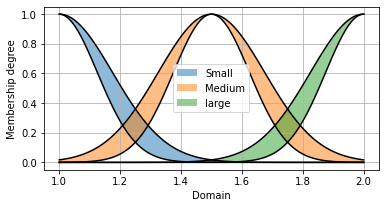

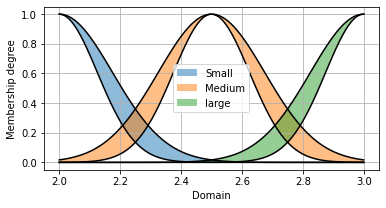

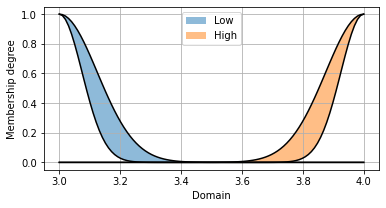

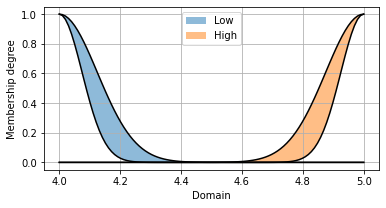

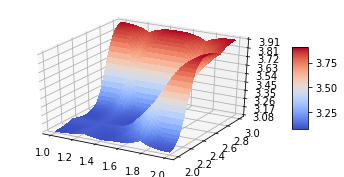

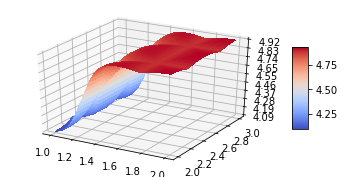

In [ ]:
from pyit2fls import Mamdani, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, crisp
from numpy import linspace, meshgrid, zeros
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Defining the domain of the input variable x1.
domain1 = linspace(1., 2., 100)

# Defining the domain of the input variable x2.
domain2 = linspace(2., 3., 100)

# Defining the domain of the output variable y1.
domain3 = linspace(3., 4., 100)

# Defining the domain of the output variable y2.
domain4 = linspace(4., 5., 100)

# Defining the Small set for the input variable x1.
Small1 = IT2FS_Gaussian_UncertStd(domain1, [1., 0.15, 0.05, 1.])

# Defining the Small set for the input variable x2.
Small2 = IT2FS_Gaussian_UncertStd(domain2, [2., 0.15, 0.05, 1.])

# Defining the Medium set for the input variable x1.
Medium1 = IT2FS_Gaussian_UncertStd(domain1, [1.5, 0.15, 0.05, 1.])

# Defining the Medium set for the input variable x2.
Medium2 = IT2FS_Gaussian_UncertStd(domain2, [2.5, 0.15, 0.05, 1.])

# Defining the Large set for the input variable x1.
Large1 = IT2FS_Gaussian_UncertStd(domain1, [2., 0.15, 0.05, 1.])

# Defining the Large set for the input variable x1.
Large2 = IT2FS_Gaussian_UncertStd(domain2, [3., 0.15, 0.05, 1.])

# Plotting the sets defined for the input variable x1.
IT2FS_plot(Small1, Medium1, Large1, 
            legends=["Small", "Medium", "large"])

# Plotting the sets defined for the input variable x1.
IT2FS_plot(Small2, Medium2, Large2,
            legends=["Small", "Medium", "large"])

# Defining the Low set for the output variable y1
Low1 = IT2FS_Gaussian_UncertStd(domain3, [3., 0.1, 0.05, 1.])

# Defining the Low set for the output variable y2
Low2 = IT2FS_Gaussian_UncertStd(domain4, [4., 0.1, 0.05, 1.])

# Defining the High set for the output variable y1
High1 = IT2FS_Gaussian_UncertStd(domain3, [4., 0.1, 0.05, 1.])

# Defining the High set for the output variable y2
High2 = IT2FS_Gaussian_UncertStd(domain4, [5., 0.1, 0.05, 1.])

# Plotting the sets defined for the output variable y1.
IT2FS_plot(Low1, High1, 
            legends=["Low", "High"])

# Plotting the sets defined for the output variable y2.
IT2FS_plot(Low2, High2, 
            legends=["Low", "High"])

# Defining the mamdani interval type 2 fuzzy logic system
myIT2FLS = Mamdani(min_t_norm, max_s_norm)

# Adding the input variables to the myIT2FLS
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")

# Adding the output variables to the myIT2FLS
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

# Defining the rule base of the MyIT2FLS
myIT2FLS.add_rule([("x1", Small1), ("x2", Small2)], [("y1", Low1), ("y2", Low2)])
myIT2FLS.add_rule([("x1", Small1), ("x2", Medium2)], [("y1", Low1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Small1), ("x2", Large2)], [("y1", Low1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Medium1), ("x2", Small2)], [("y1", Low1), ("y2", Low2)])
myIT2FLS.add_rule([("x1", Medium1), ("x2", Medium2)], [("y1", Low1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Medium1), ("x2", Large2)], [("y1", High1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Large1), ("x2", Small2)], [("y1", High1), ("y2", Low2)])
myIT2FLS.add_rule([("x1", Large1), ("x2", Medium2)], [("y1", High1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Large1), ("x2", Large2)], [("y1", High1), ("y2", High2)])

# Evaluating the outputs of the myIT2FLS for the points in the input domain, 
# and plotting the output surfaces.
X1, X2 = meshgrid(domain1, domain2)
Z1 = zeros(shape=(len(domain1), len(domain2)))
Z2 = zeros(shape=(len(domain1), len(domain2)))
for i, x1 in zip(range(len(domain1)), domain1):
    for j, x2 in zip(range(len(domain2)), domain2):
        it2out, tr = myIT2FLS.evaluate({"x1":x1, "x2":x2})
        Z1[i, j], Z2[i, j] = crisp(tr["y1"]), crisp(tr["y2"])

fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X1, X2, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X1, X2, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()





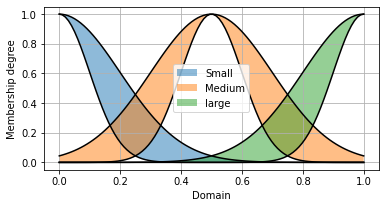

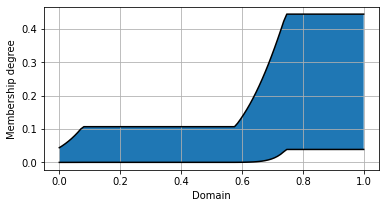

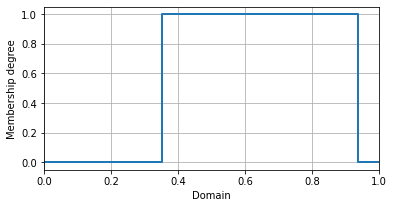

0.6434985240365899


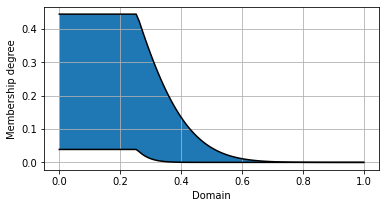

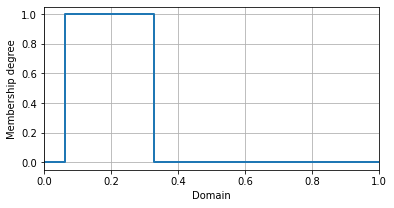

0.19561905995749373


In [ ]:
from pyit2fls import IT2FLS, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, TR_plot, crisp
from numpy import linspace

domain = linspace(0., 1., 100)  # Domain is defined as discrete space in the
                                # interval [0, 1] divided to 100 parts.

# The Small set is defined as a Guassian IT2FS with uncertain standard deviation 
# value. The mean, the standard deviation center, the standard deviation spread, 
# and the height of the set are set to 0., 0.15, 0.1, and 1., respectively.
Small = IT2FS_Gaussian_UncertStd(domain, [0, 0.15, 0.1, 1.])

# The Medium set is defined as a Guassian IT2FS with uncertain standard deviation 
# value. The mean, the standard deviation center, the standard deviation spread, 
# and the height of the set are set to 0.5, 0.15, 0.1, and 1., respectively.
Medium = IT2FS_Gaussian_UncertStd(domain, [0.5, 0.15, 0.1, 1.])

# The Large set is defined as a Guassian IT2FS with uncertain standard deviation 
# value. The mean, the standard deviation center, the standard deviation spread, 
# and the height of the set are set to 1., 0.15, 0.1, and 1., respectively.
Large = IT2FS_Gaussian_UncertStd(domain, [1., 0.15, 0.1, 1.])

# Three sets, Small, Medium, and Large are plotted using the function IT2FS_plot.
IT2FS_plot(Small, Medium, Large, legends=["Small", "Medium", "large"], filename="simp_ex_sets")

# An Interval Type 2 Fuzzy Logic System is created. The variables and output 
# variables are defined. As it can be seen, the system has two inputs and two 
# outputs.
myIT2FLS = IT2FLS()
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

# Now we are going to add the fuzzy IF-THEN rules.
# There are three rules to add:
# 1. IF x1 is Small AND x2 is Small THEN y1 is Small AND y2 is Large
myIT2FLS.add_rule([("x1", Small), ("x2", Small)], [("y1", Small), ("y2", Large)])
# 2. IF x1 is Medium AND x2 is Medium THEN y1 is Medium AND y2 is Small
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], [("y1", Medium), ("y2", Small)])
# 3. IF x1 is Large AND x2 is Large THEN y1 is Large AND y2 is Small
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], [("y1", Large), ("y2", Small)])

# To evaluate the defined IT2FLS the minimum t-norm and maximum s-norm are used. 
# The centroid method is selected for evaluating the IF-THEN rules and the 
# KM algorithm is selected as type reduction algorithm. The first input is 0.923 and 
# the second one is 0.745.
it2out, tr = myIT2FLS.evaluate({"x1":0.923, "x2":0.745}, min_t_norm, max_s_norm, domain, 
                               method= "Centroid", algorithm= "KM")

# Here the output IT2FSs and their type reduced versions are plotted.
# The crisp output is also calculated and printed.
it2out["y1"].plot(filename="y1_out")
TR_plot(domain, tr["y1"], filename="y1_tr")
print(crisp(tr["y1"]))

it2out["y2"].plot(filename="y2_out")
TR_plot(domain, tr["y2"], filename="y2_tr")
print(crisp(tr["y2"]))

In [ ]:
%%capture
!pip install pyit2fls

## Type II Tags√°gi f√ºggv√©nyek

In [ ]:
from pyit2fls import IT2FLS, Mamdani, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, TR_plot, crisp
from numpy import linspace
from time import time



domain = linspace(0., 1., 100)

Small = IT2FS_Gaussian_UncertStd(domain, [0, 0.15, 0.1, 1.])
Medium = IT2FS_Gaussian_UncertStd(domain, [0.5, 0.15, 0.1, 1.])
Large = IT2FS_Gaussian_UncertStd(domain, [1., 0.15, 0.1, 1.])

myIT2FLS = Mamdani(min_t_norm, max_s_norm)
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

myIT2FLS.add_rule([("x1", Small), ("x2", Small)], [("y1", Small), ("y2", Large)])
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], [("y1", Medium), ("y2", Small)])
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], [("y1", Large), ("y2", Small)])

t = time()

for i in range(1000):
    it2out, tr = myIT2FLS.evaluate({"x1":0.923, "x2":0.745})
    
print("Mamdani average execution time:", (time() -t) / 1000)



 
myIT2FLS = IT2FLS()
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

myIT2FLS.add_rule([("x1", Small), ("x2", Small)], [("y1", Small), ("y2", Large)])
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], [("y1", Medium), ("y2", Small)])
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], [("y1", Large), ("y2", Small)])

t = time()

for i in range(1000):
    it2out, tr = myIT2FLS.evaluate({"x1":0.923, "x2":0.745}, min_t_norm, max_s_norm, domain)

print("IT2FLS average execution time:", (time() -t) / 1000)

Mamdani average execution time: 0.0007981038093566894
IT2FLS average execution time: 0.0007837884426116944


## Fuzzy Type II halmazok

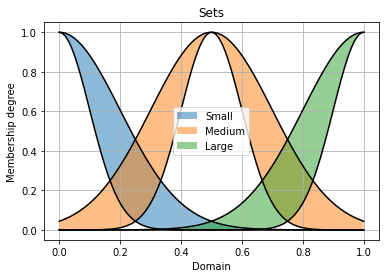

{'y1': 5.491463312635011, 'y2': 3.829641260665918}


In [ ]:
from pyit2fls import TSK, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     product_t_norm, max_s_norm

from numpy import linspace
from time import time

domain = linspace(0., 1., 100)

Small = IT2FS_Gaussian_UncertStd(domain, [0, 0.15, 0.1, 1.])
Medium = IT2FS_Gaussian_UncertStd(domain, [0.5, 0.15, 0.1, 1.])
Large = IT2FS_Gaussian_UncertStd(domain, [1., 0.15, 0.1, 1.])
IT2FS_plot(Small, Medium, Large, title="Sets", 
           legends=["Small", "Medium", "Large"])

myIT2FLS = TSK(product_t_norm, max_s_norm)

myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

# IF x1 is Small AND x2 is Small
# THEN y1 = x1 + 2.3 x2 + 0.5 AND y2 = 1.2 x1 + 1.5 x2 + 1.
myIT2FLS.add_rule([("x1", Small), ("x2", Small)], 
                  [("y1", {"const":0.5, "x1":1., "x2":2.3}), 
                   ("y2", {"const":1., "x1":1.2, "x2":1.5})])

# IF x1 is Medium AND x2 is Medium
# THEN y1 = 2.7 x1 + 1.9 x2 + 1. AND y2 = 2.5 x1 + 2. x2 + 1.
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], 
                  [("y1", {"const":1., "x1":2.7, "x2":1.9}), 
                   ("y2", {"const":1., "x1":2.5, "x2":2.})])

# IF x1 is Large AND x2 is Large
# THEN y1 = 2. x1 + 3. x2 + 1. AND y2 = x1 + x2 + 2.
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], 
                  [("y1", {"const":1., "x1":2., "x2":3.}), 
                   ("y2", {"const":2., "x1":1., "x2":1.})])

print(myIT2FLS.evaluate({"x1":0.9, "x2":0.9}))


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhaszn√°lt irodalom √©s internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Fuzzy Inference Part 4
<br>
https://www.youtube.com/watch?v=Q6QDVIwztyU


MathWorks - Fuzzy Logic Toolbox
<br>
https://www.mathworks.com/products/fuzzy-logic.html


MathWorks - Getting Started with Fuzzy Logic Toolbox, Part 1
<br>
https://www.mathworks.com/videos/getting-started-with-fuzzy-logic-toolbox-part-1-68764.html


MathWorks - Fuzzy Inference
<br>
https://www.mathworks.com/help/fuzzy/fuzzy-inference-process.html


MathWorks - Fuzzy Logic Controller
<br>
https://www.mathworks.com/help/fuzzy/fuzzylogiccontroller.html


Math AP¬ÆÔ∏é/College Statistics Confidence intervals Confidence intervals for proportions
<br>
https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/v/conditions-for-valid-confidence-intervals

Getting Started with Fuzzy Logic Toolbox (Matlab)
<br>
https://www.youtube.com/watch?v=LupUhRJo_sU

How to work with Fuzzy Membership functions in Matlab
<br>
https://www.youtube.com/watch?v=vG3w4JVAKa0


Wikipedia - 'Fuzzy control system'
<br>
https://en.wikipedia.org/wiki/Fuzzy_control_system


Wikipedia - 'Fuzzy logic'
<br>
https://en.wikipedia.org/wiki/Fuzzy_logic

------------

[1]
Fuzzy Logic Toolbox for Python API
<br>
https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html

------------


Digit√°lis Tank√∂nyvt√°r - Fuzzy rendszerek
K√≥czy T. L√°szl√≥, Tikk Domonkos
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tkt/fuzzy-rendszerek-fuzzy/ch03.html


Digit√°lis Tank√∂nyvt√°r - A bizonytalans√°gi k√∂vetkeztet√©s egy√©b m√≥dszerei
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/ch14s07.html


------------

Nagyon √©dekes Demo - Fuzzy Car Simulator
<br>
https://github.com/daniel4lee/fuzzy-system






```
# K√∂sz√∂n√∂m a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```
